Agatha Justina Majcher  
M.Sc. Renewable Energy Systems

# Distributional Analysis of the Carbon Tax in South Africa

# Analysis of all scenarios

n0 - base IRP 2019 with max 275 MtCo2

n1 - with additional investment add_carbontax_constraint and max 275 MtCO2 - NOT USED!

n2 - with additional investment add_carbontax_constraint2 (not annualized) and max 275 MtCO2
(test)

n3 - with emission prices (30 USD/tCO2) -> opt Ep



val-2Gt-IRP_27-supply_redz_lcopt_Co2L

val-2Gt-IRP_27-supply_redz_lcopt_Co2L-Ep

# 1. Setup

In [3]:
import sys
sys.path.append("~/Desktop/pypsa-za-master")

In [4]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [5]:
import pandas as pd
import geopandas as gpd
import numpy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
from vresutils import plot as vplot
from vresutils import Dict

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)

In [52]:
# setup for plots
colors = {
    "onwind": "#77D1E4",
    "hydro": "#004F95",
    "hydro-import": "#0077AA",
    "CSP": "#FEED82",
    "solar": "#FFBB4E",
    "biomass": "#0c6013",
    "CCGT": "#CCC8C8",
    "OCGT": "#8D7867",
    "nuclear": "#C84936",
    "gas": "grey",
    "coal": "#3C3C3C",
}

nice_names = {
    'nuclear': 'Nuclear',
    'coal': 'Coal',
    'CCGT': 'CCGT',
    'OCGT': 'OCGT',
    'gas': 'Gas',
    'onwind': 'Wind',
    'hydro': 'Hydro',
    'hydro-import': 'Hydro Import',
    'solar': 'PV',
    'CSP': 'CSP',
    'biomass': 'Biomass',
}

In [9]:
# solved_network files

n0 = pypsa.Network("~/Desktop/final_networks/neu/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_base.nc")
n1 = pypsa.Network("~/Desktop/final_networks/neu/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_inv_1.nc") 
n2 = pypsa.Network("~/Desktop/final_networks/neu/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_inv_2.nc")
n3 = pypsa.Network("~/Desktop/final_networks/neu/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-Ep-1H.nc")


INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_base.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_inv_1.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_inv_2.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-Ep-1H.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [10]:
for c in n0.iterate_components(list(n0.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 27 entries
Component 'Carrier' has 12 entries
Component 'GlobalConstraint' has 17 entries
Component 'Line' has 120 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Load' has 27 entries
Component 'Generator' has 695 entries
Component 'StorageUnit' has 328 entries


In [11]:
n0.generators[(n0.generators.carrier=="onwind")]

bus carrier  build_year  \
Generator                                                               
KAROO REIPPPP_BW1_onwind                    KAROO  onwind        2020   
PENINSULA REIPPPP_BW1_onwind            PENINSULA  onwind        2020   
PORT ELIZABETH REIPPPP_BW1_onwind  PORT ELIZABETH  onwind        2020   
WEST COAST REIPPPP_BW1_onwind          WEST COAST  onwind        2020   
EAST LONDON REIPPPP_BW2_onwind        EAST LONDON  onwind        2020   
...                                           ...     ...         ...   
HIGHVELD SOUTH onwind_2030         HIGHVELD SOUTH  onwind        2030   
HIGHVELD NORTH onwind_2030         HIGHVELD NORTH  onwind        2030   
LOWVELD onwind_2030                       LOWVELD  onwind        2030   
NEWCASTLE onwind_2030                   NEWCASTLE  onwind        2030   
EMPANGENI onwind_2030                   EMPANGENI  onwind        2030   

                                   lifetime   p_nom  p_nom_extendable  \
Generator                                                               
KAROO REIPPPP_BW1_onwind               14.0  171.33             False   
PENINSULA REIPPPP_BW1_onwind           14.0   27.00             False   
PORT ELIZABETH REIPPPP_BW1_onwind      14.0  375.61             False   
WEST COAST REIPPPP_BW1_onwind          14.0  165.40             False   
EAST LONDON REIPPPP_BW2_onwind         16.5  152.05             False   
...                                     ...     ...               ...   
HIGHVELD SOUTH onwind_2030             20.0    0.00              True   
HIGHVELD NORTH onwind_2030             20.0    0.00              True   
LOWVELD onwind_2030                    20.0    0.00              True   
NEWCASTLE onwind_2030                  20.0    0.00              True   
EMPANGENI onwind_2030                  20.0    0.00              True   

                                   efficiency  ramp_limit_up  ramp_limit_down  \
Generator                                                                       
KAROO REIPPPP_BW1_onwind                  1.0            NaN              NaN   
PENINSULA REIPPPP_BW1_onwind              1.0            NaN              NaN   
PORT ELIZABETH REIPPPP_BW1_onwind         1.0            NaN              NaN   
WEST COAST REIPPPP_BW1_onwind             1.0            NaN              NaN   
EAST LONDON REIPPPP_BW2_onwind            1.0            NaN              NaN   
...                                       ...            ...              ...   
HIGHVELD SOUTH onwind_2030                1.0            NaN              NaN   
HIGHVELD NORTH onwind_2030                1.0            NaN              NaN   
LOWVELD onwind_2030                       1.0            NaN              NaN   
NEWCASTLE onwind_2030                     1.0            NaN              NaN   
EMPANGENI onwind_2030                     1.0            NaN              NaN   

                                   marginal_cost  capital_cost  \
Generator                                                        
KAROO REIPPPP_BW1_onwind             1513.009030  0.000000e+00   
PENINSULA REIPPPP_BW1_onwind         1513.009372  0.000000e+00   
PORT ELIZABETH REIPPPP_BW1_onwind    1513.009786  0.000000e+00   
WEST COAST REIPPPP_BW1_onwind        1125.009423  0.000000e+00   
EAST LONDON REIPPPP_BW2_onwind       1186.010617  0.000000e+00   
...                                          ...           ...   
HIGHVELD SOUTH onwind_2030              0.024383  1.965003e+06   
HIGHVELD NORTH onwind_2030              0.025326  1.965003e+06   
LOWVELD onwind_2030                     0.025849  1.965003e+06   
NEWCASTLE onwind_2030                   0.024563  1.965003e+06   
EMPANGENI onwind_2030                   0.024742  1.965003e+06   

                                                          plant_name control  \
Generator                                                                      
KAROO REIPPPP_BW1_onwind                    KAROO REIPPPP_BW1_onwind     

# 2. Capacity

In [14]:
# Get capacities before optimization
capacities_before = n0.generators.groupby('carrier')['p_nom'].sum()

# Get capacities after optimization for each network
capacities_after_n0 = n0.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n1 = n1.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n2 = n2.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n3 = n3.generators.groupby('carrier')['p_nom_opt'].sum()

# Combine all the data into one DataFrame
all_networks_data = pd.concat([capacities_before, capacities_after_n0, capacities_after_n1, capacities_after_n2, capacities_after_n3], axis=1, keys=['Before', 'n0', 'n1', 'n2', 'n3'])
all_networks_data.columns.names = ['Capacity']

# Apply formatting to all columns except the "Before" column
formatted_networks_data = all_networks_data.applymap(lambda x: f'{x:.2f}' if x != 0 else '0.00')

# Print or display the formatted DataFrame
print(formatted_networks_data)

# Save the formatted DataFrame to a CSV file
formatted_networks_data.to_csv('formatted_generator_capacities_by_carrier.csv')




Capacity            Before           n0           n1           n2           n3
carrier                                                                       
CCGT                  0.00         0.00         0.00         0.00       716.52
CSP                 600.00       600.00       600.00       600.00       600.00
OCGT                  0.00     12062.02     11198.41     10207.51      5199.60
biomass             193.06       193.06       193.06       193.06       193.06
coal              40284.00     40284.00     40284.00     40284.00     40284.00
gas                3844.00      3844.00      3844.00      3844.00      3844.00
hydro               683.02       683.02       683.02       683.02       683.02
hydro-import       1764.00      1764.00      1764.00      1764.00      1764.00
load_shedding  27000000.00  27000000.00  27000000.00  27000000.00  27000000.00
nuclear            1854.00      1854.00      1854.00      1854.00      1854.00
onwind             5190.59     13290.59     25846.86

# 3. Generation

In [15]:
sum_n0 = n0.generators_t.p.sum().groupby(n0.generators.carrier).sum()
sum_n1 = n1.generators_t.p.sum().groupby(n1.generators.carrier).sum()
sum_n2 = n2.generators_t.p.sum().groupby(n2.generators.carrier).sum()
sum_n3 = n3.generators_t.p.sum().groupby(n3.generators.carrier).sum()

df_n0 = sum_n0.reset_index().rename(columns={0: 'n0'})
df_n1 = sum_n1.reset_index().rename(columns={0: 'n1'})
df_n2 = sum_n2.reset_index().rename(columns={0: 'n2'})
df_n3 = sum_n3.reset_index().rename(columns={0: 'n3'})

combined_df = df_n0.merge(df_n1, on='carrier').merge(df_n2, on='carrier').merge(df_n3, on='carrier')


# Sum for each column
sum_row = combined_df.sum(numeric_only=True)
sum_row['carrier'] = 'SUM'
combined_df_with_sum = combined_df.append(sum_row, ignore_index=True)

print(combined_df_with_sum)

combined_df_with_sum.to_csv('combined_sums_with_total.csv', index=False)



          carrier            n0            n1            n2            n3
0            CCGT  0.000000e+00  0.000000e+00  0.000000e+00  1.883004e+06
1             CSP  1.986336e+06  1.986336e+06  1.986336e+06  1.986336e+06
2            OCGT  7.951376e+05  2.191150e+05  1.311934e+05  7.466946e+03
3         biomass  9.567008e+05  9.567008e+05  9.567008e+05  9.567008e+05
4            coal  1.657685e+08  1.171427e+08  7.390617e+07  2.927738e+07
5             gas  5.236791e+05  4.830063e+05  4.763922e+05  4.703348e+05
6           hydro  5.137436e+06  3.529179e+06  1.851032e+06  2.296070e+06
7    hydro-import  1.013829e+07  9.317461e+06  6.085870e+06  4.654664e+06
8   load_shedding  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
9         nuclear  1.357096e+07  1.347808e+07  1.256801e+07  1.130130e+07
10         onwind  4.442806e+07  8.669694e+07  1.128215e+08  1.621914e+08
11          solar  3.483787e+07  4.454777e+07  6.791078e+07  6.423713e+07
12            SUM  2.781430e+08  2.783

## Total Generation

In [101]:
total_generation = {
    'n0': n0.generators_t.p.sum().sum() / 1e3,  
    'n1': n1.generators_t.p.sum().sum() / 1e3,
    'n2': n2.generators_t.p.sum().sum() / 1e3,
    'n3': n3.generators_t.p.sum().sum() / 1e3
}

total_generation_df = pd.DataFrame.from_dict(total_generation, orient='index', columns=['Total Generation in GWh'])

print(total_generation_df)

total_generation_df.to_csv('total_generation.csv')


    Total Generation in GWh
n0            278143.004648
n1            278357.287786
n2            278693.971515
n3            279261.783058


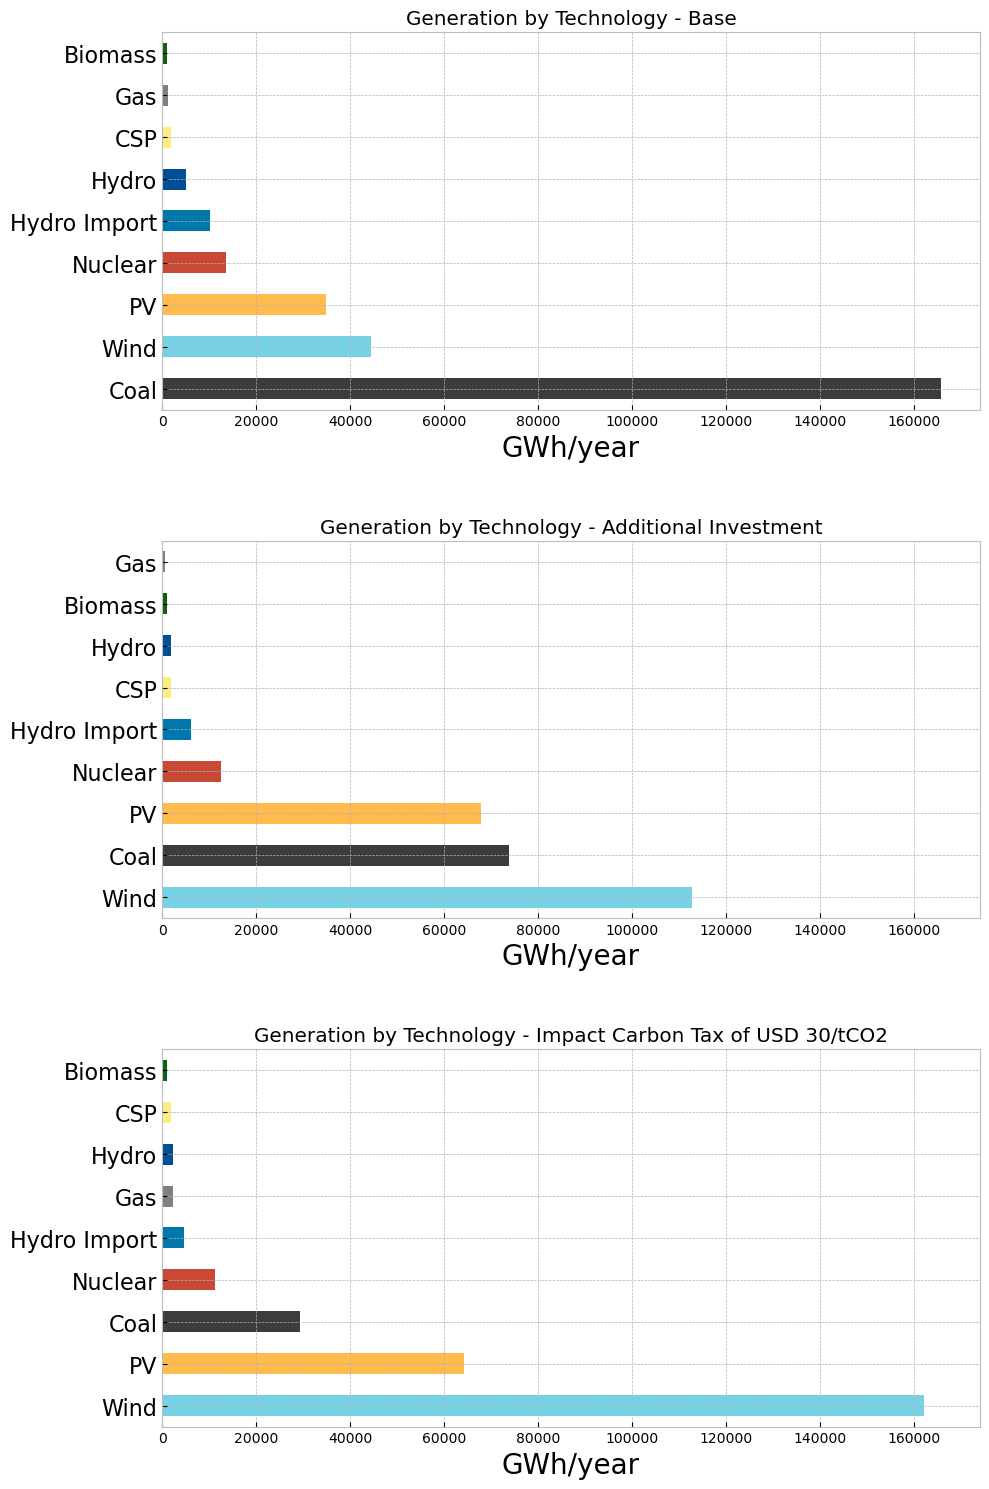

In [53]:
def plot_network_generation(network, ax, title):
    # Group by carrier and sum p_nom, divide by 1000 to convert to GW
    a = network.generators_t.p.sum().groupby(network.generators.carrier).sum().div(1e3)
    
    # Add ocgt and ccgt to gas and remove ocgt and ccgt
    a['gas'] = a.get('gas', 0) + a['OCGT'] + a['CCGT']
    a = a.drop(['OCGT', 'CCGT'])
    
    a = a[a != 0]

    carrier_order = ['onwind', 'solar', 'CSP', 'hydro', 'hydro-import', 'biomass', 'gas', 'nuclear', 'coal']
    a_sorted = a.loc[carrier_order].sort_values(ascending=False)

    # Create horizontal bar chart on the given ax
    a_sorted.plot.barh(color=[colors.get(carrier, '#333333') for carrier in a_sorted.index], ax=ax)
    ax.set_xlabel('GWh/year', fontsize=20)
    ax.set_title(title)
    ax.set_facecolor('white')
    ax.set_yticklabels([nice_names.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()], fontsize=16)

    ax.set_ylabel('')  # This sets the y-axis label to an empty string

    
# Create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

plot_network_generation(n0, axes[0], 'Generation by Technology - Base')
#plot_network_generation(n1, axes[0, 1], 'Generation by Technology n1')
plot_network_generation(n2, axes[1], 'Generation by Technology - Additional Investment')
plot_network_generation(n3, axes[2], 'Generation by Technology - Impact Carbon Tax of USD 30/tCO2')

# Find the global minimum and maximum for the x-axes
min_x = min(ax.get_xlim()[0] for ax in axes.flatten())
max_x = max(ax.get_xlim()[1] for ax in axes.flatten())

# Set the x limits for all the subplots to be the same
for ax in axes.flatten():
    ax.set_xlim(min_x, max_x)

    
plt.tight_layout(h_pad=4.0)
plt.savefig('combined_plot.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


#### Generated Electricity per Day

In [24]:
# power (MWh) sum of 8760h /24 - MWh per day /1000 - GW per day
p_by_carrier_n0 = n0.generators_t.p.groupby(n0.generators.carrier, axis=1).sum()
p_by_carrier_n0 = p_by_carrier_n0.droplevel(level='period')
p_by_carrier_n0 = p_by_carrier_n0.drop(columns=["load_shedding"])

p_by_carrier_n1 = n1.generators_t.p.groupby(n1.generators.carrier, axis=1).sum()
p_by_carrier_n1 = p_by_carrier_n1.droplevel(level='period')
p_by_carrier_n1 = p_by_carrier_n1.drop(columns=["load_shedding"])

p_by_carrier_n2 = n2.generators_t.p.groupby(n2.generators.carrier, axis=1).sum()
p_by_carrier_n2 = p_by_carrier_n2.droplevel(level='period')
p_by_carrier_n2 = p_by_carrier_n2.drop(columns=["load_shedding"])

p_by_carrier_n3 = n3.generators_t.p.groupby(n3.generators.carrier, axis=1).sum()
p_by_carrier_n3 = p_by_carrier_n3.droplevel(level='period')
p_by_carrier_n3 = p_by_carrier_n3.drop(columns=["load_shedding"])

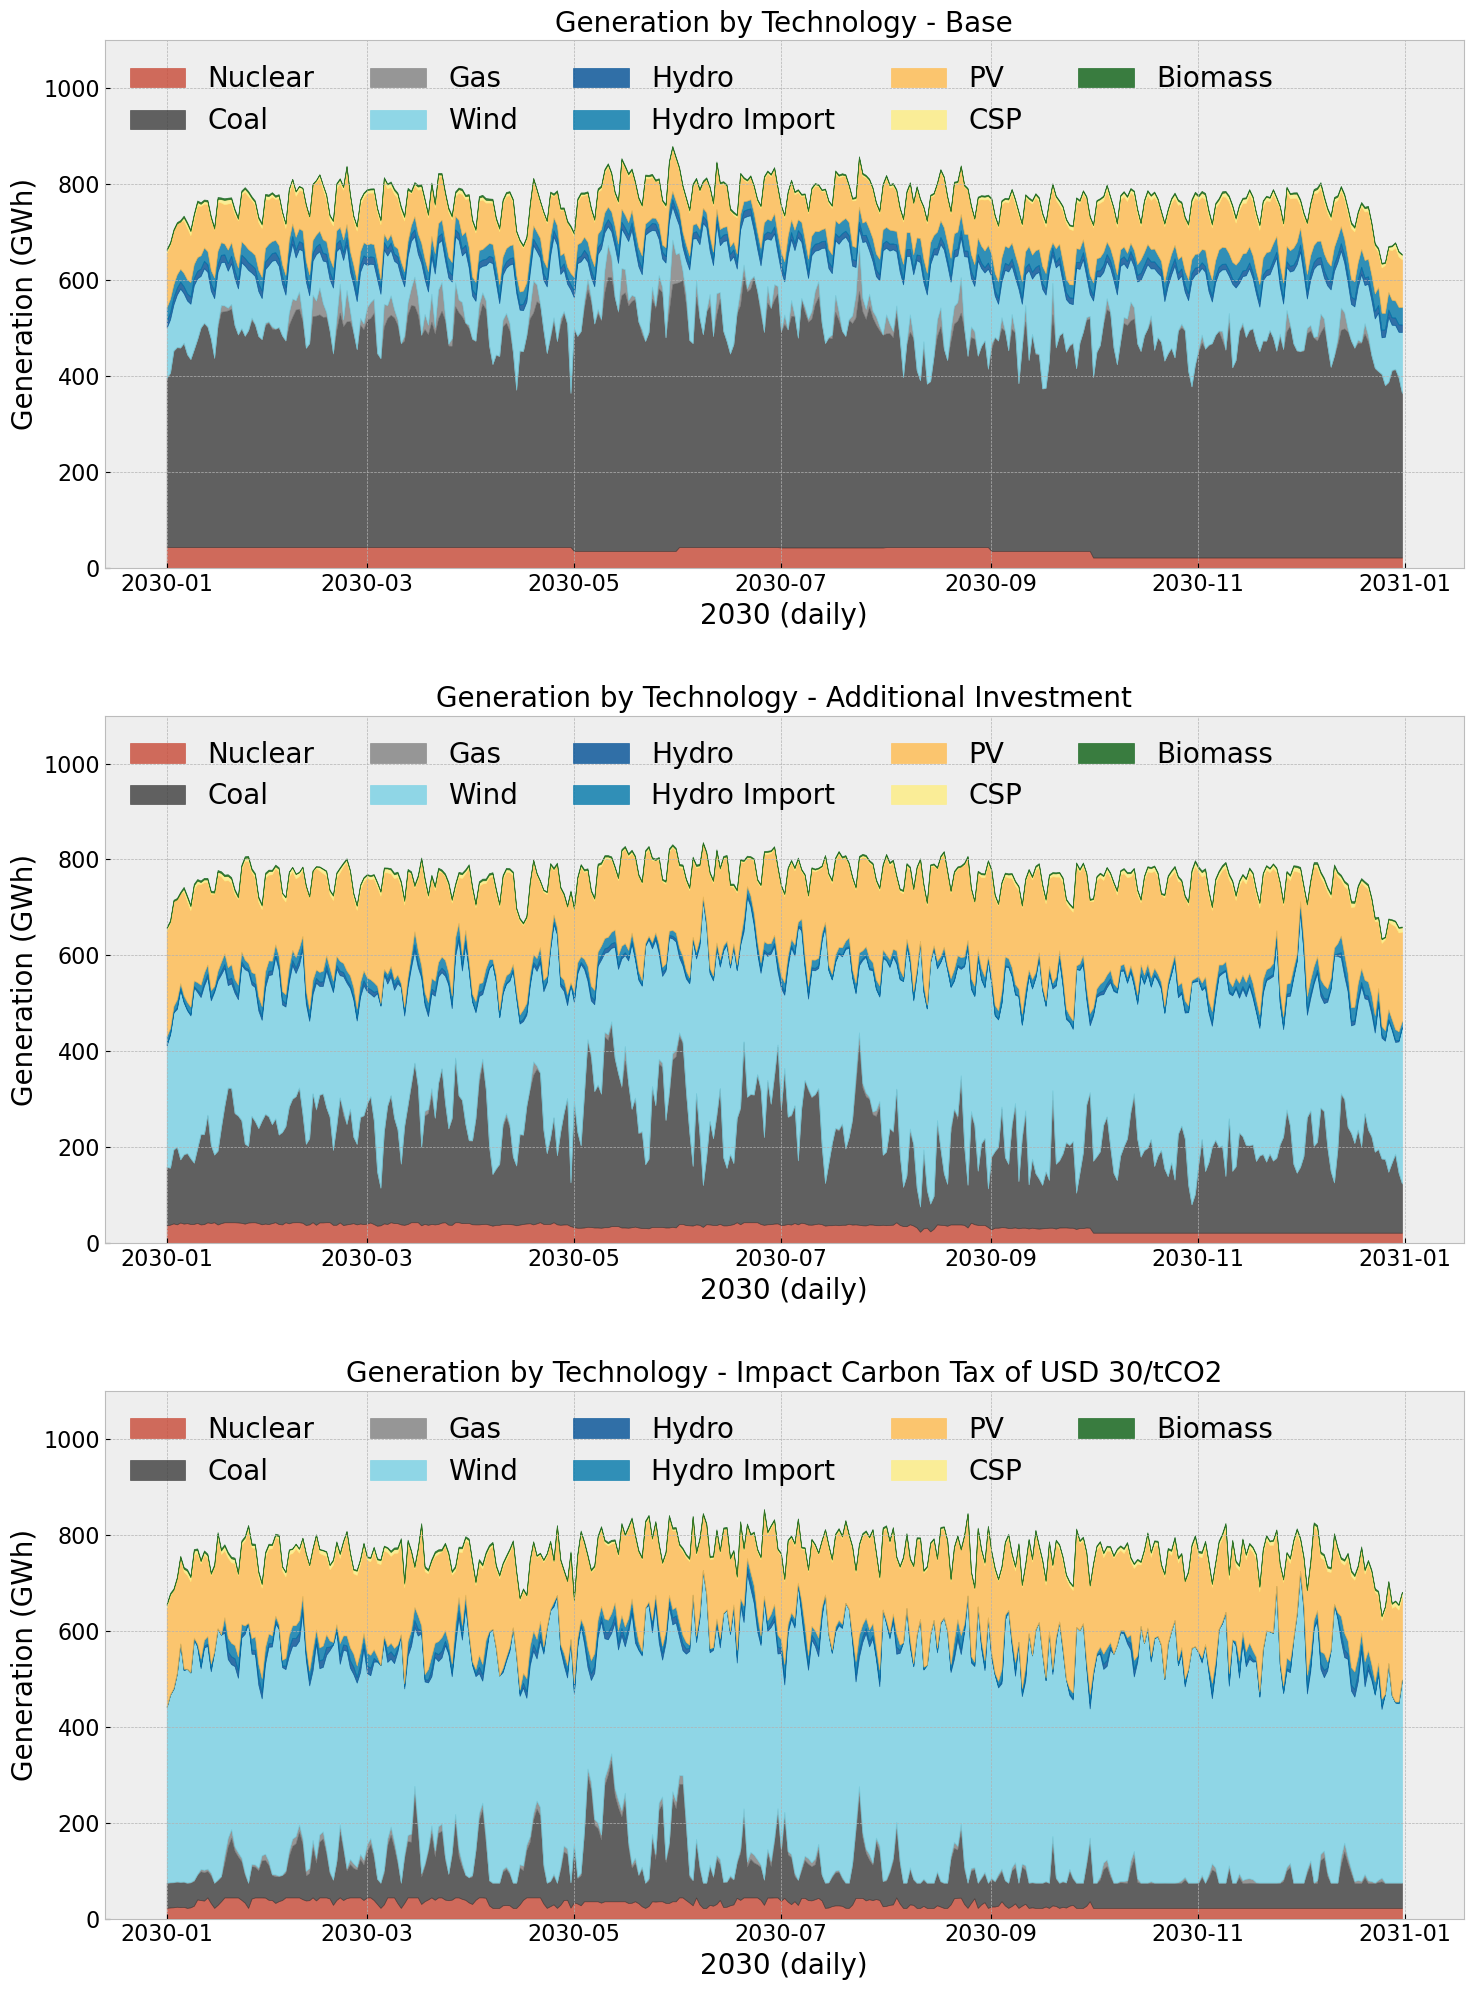

In [54]:
def plot_generation_per_day(p_by_carrier, ax, title):
    # Aggregate OCGT and CCGT into gas and remove them
    if 'OCGT' in p_by_carrier.columns:
        p_by_carrier['gas'] = p_by_carrier.get('gas', 0) + p_by_carrier['OCGT']
        p_by_carrier = p_by_carrier.drop(columns=['OCGT'])

    if 'CCGT' in p_by_carrier.columns:
        p_by_carrier['gas'] += p_by_carrier['CCGT']
        p_by_carrier = p_by_carrier.drop(columns=['CCGT'])
    
    p_by_carrier_resampled = p_by_carrier.resample("D").sum()/1e3
    stacked = p_by_carrier_resampled.stack().reset_index()
    stacked.columns = ['week', 'carrier', 'GW']
    stacked = stacked.pivot(index='week', columns='carrier', values='GW')
    bottom = 0

    for carrier in nice_names:
        if carrier in stacked.columns:
            data = stacked[carrier]
            ax.fill_between(
                data.index, bottom, bottom + data, 
                color=colors[carrier], alpha=0.8, label=nice_names[carrier]
            )
            bottom += data

    ax.legend(ncol=5, loc="upper left", frameon=False, fontsize=20)
    ax.set_xlabel("2030 (daily)", fontsize=20)
    ax.set_ylabel("Generation (GWh)", fontsize=20)
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(0,1100)

    

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

plot_generation_per_day(p_by_carrier_n0, axes[0], 'Generation by Technology - Base')
#plot_generation_per_day(p_by_carrier_n1, axes[0, 1], 'Generation by Technology n1 per Day')
plot_generation_per_day(p_by_carrier_n2, axes[1], 'Generation by Technology - Additional Investment')
plot_generation_per_day(p_by_carrier_n3, axes[2], 'Generation by Technology - Impact Carbon Tax of USD 30/tCO2')

# Set the common x limits
#for ax in axes.flatten():
#    ax.set_xlim(pd.Timestamp('2030-03-29'), pd.Timestamp('2030-03-31'))

plt.tight_layout(h_pad=4.0)
plt.savefig('time_generation_combined.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


In [26]:
p_by_carrier_n0

carrier              CCGT       CSP  OCGT     biomass          coal   gas  \
timestep                                                                    
2030-01-01 00:00:00   0.0    0.0000   0.0  111.678740  15941.730676  52.5   
2030-01-01 01:00:00   0.0    0.0000   0.0  112.006711  15507.705822  52.5   
2030-01-01 02:00:00   0.0    0.0000   0.0  114.293647  15912.500709  52.5   
2030-01-01 03:00:00   0.0    0.0000   0.0  114.320240  16032.100461  52.5   
2030-01-01 04:00:00   0.0    0.0000   0.0  115.942369  16422.501616  52.5   
...                   ...       ...   ...         ...           ...   ...   
2030-12-31 19:00:00   0.0  498.9864   0.0   77.359852  17711.200499  52.5   
2030-12-31 20:00:00   0.0  491.3628   0.0   75.465478  17781.937956  52.5   
2030-12-31 21:00:00   0.0  480.5580   0.0   74.771127  16833.937956  52.5   
2030-12-31 22:00:00   0.0  133.6452   0.0   74.710747  15808.127113  52.5   
2030-12-31 23:00:00   0.0  110.1204   0.0   74.740937  14974.127113  52.5   

carrier                hydro  hydro-import  nuclear       onwind       solar  
timestep                                                                      
2030-01-01 00:00:00  599.592   1148.349008  1835.46  6841.609228    0.000000  
2030-01-01 01:00:00  599.592   1158.343343  1835.46  6500.952125    0.000000  
2030-01-01 02:00:00  599.592   1159.342776  1835.46  4967.557801    0.000000  
2030-01-01 03:00:00  599.592   1147.349575  1835.46  4374.173641    0.000000  
2030-01-01 04:00:00  599.592   1131.358640  1835.46  3835.769715    0.000000  
...                      ...           ...      ...          ...         ...  
2030-12-31 19:00:00  650.024   1569.110482   927.00  6650.693232  112.850328  
2030-12-31 20:00:00  650.024   1528.133711   927.00  6981.987473    0.000000  
2030-12-31 21:00:00  650.024   1466.168839   927.00  7084.579011    0.000000  
2030-12-31 22:00:00  650.024   1375.220397   927.00  7264.265336    0.000000  
2030-12-31 23:00:00  650.024   1363.227195   927.00  7417.831155    0.000000  

[8760 rows x 11 columns]

In [27]:
p_by_carrier_n1

carrier              CCGT       CSP  OCGT     biomass          coal   gas  \
timestep                                                                    
2030-01-01 00:00:00   0.0    0.0000   0.0  111.678740   9786.401594  52.5   
2030-01-01 01:00:00   0.0    0.0000   0.0  112.006711  10002.401594  52.5   
2030-01-01 02:00:00   0.0    0.0000   0.0  114.293647  10431.414361  52.5   
2030-01-01 03:00:00   0.0    0.0000   0.0  114.320240  11153.689711  52.5   
2030-01-01 04:00:00   0.0    0.0000   0.0  115.942369  11972.574734  52.5   
...                   ...       ...   ...         ...           ...   ...   
2030-12-31 19:00:00   0.0  498.9864   0.0   77.359852  10919.518737  52.5   
2030-12-31 20:00:00   0.0  491.3628   0.0   75.465478  10245.412177  52.5   
2030-12-31 21:00:00   0.0  480.5580   0.0   74.771127   9085.345904  52.5   
2030-12-31 22:00:00   0.0  133.6452   0.0   74.710747   8869.345904  52.5   
2030-12-31 23:00:00   0.0  110.1204   0.0   74.740937   8653.345904  52.5   

carrier                   hydro  hydro-import  nuclear        onwind  \
timestep                                                               
2030-01-01 00:00:00  599.592000   1148.349008  1835.46  13333.584790   
2030-01-01 01:00:00  599.592000   1158.343343  1835.46  12806.025151   
2030-01-01 02:00:00  599.592000   1159.342776  1835.46  10448.644149   
2030-01-01 03:00:00  599.592000   1147.349575  1835.46   9252.584391   
2030-01-01 04:00:00  599.592000   1131.358640  1835.46   8285.696597   
...                         ...           ...      ...           ...   
2030-12-31 19:00:00  650.024000   1569.110482   927.00  14268.966460   
2030-12-31 20:00:00  650.024000   1528.133711   927.00  14873.146329   
2030-12-31 21:00:00  650.024000   1466.168839   927.00  15171.335735   
2030-12-31 22:00:00  650.024000   1375.220397   927.00  15158.321495   
2030-12-31 23:00:00  522.543891   1363.227195   927.00  15198.491462   

carrier                  solar  
timestep                        
2030-01-01 00:00:00   0.000000  
2030-01-01 01:00:00   0.000000  
2030-01-01 02:00:00   0.000000  
2030-01-01 03:00:00   0.000000  
2030-01-01 04:00:00   0.000000  
...                        ...  
2030-12-31 19:00:00  84.493366  
2030-12-31 20:00:00   0.000000  
2030-12-31 21:00:00   0.000000  
2030-12-31 22:00:00   0.000000  
2030-12-31 23:00:00   0.000000  

[8760 rows x 11 columns]

In [28]:
p_by_carrier_n2

carrier              CCGT       CSP  OCGT     biomass         coal   gas  \
timestep                                                                   
2030-01-01 00:00:00   0.0    0.0000   0.0  111.678740  6350.545240  52.5   
2030-01-01 01:00:00   0.0    0.0000   0.0  112.006711  5990.545240  52.5   
2030-01-01 02:00:00   0.0    0.0000   0.0  114.293647  6475.267231  52.5   
2030-01-01 03:00:00   0.0    0.0000   0.0  114.320240  7231.267231  52.5   
2030-01-01 04:00:00   0.0    0.0000   0.0  115.942369  7941.333461  52.5   
...                   ...       ...   ...         ...          ...   ...   
2030-12-31 19:00:00   0.0  498.9864   0.0   77.359852  6852.521653  52.5   
2030-12-31 20:00:00   0.0  491.3628   0.0   75.465478  5951.746169  52.5   
2030-12-31 21:00:00   0.0  480.5580   0.0   74.771127  4844.792028  52.5   
2030-12-31 22:00:00   0.0  133.6452   0.0   74.710747  4484.792028  52.5   
2030-12-31 23:00:00   0.0  110.1204   0.0   74.740937  4094.792028  52.5   

carrier                  hydro  hydro-import  nuclear        onwind      solar  
timestep                                                                        
2030-01-01 00:00:00   0.000000   1148.349008  1835.46  17032.386664    0.00000  
2030-01-01 01:00:00   0.000000    608.176410  1835.46  16766.093668    0.00000  
2030-01-01 02:00:00   0.000000    354.052930  1835.46  15809.673124    0.00000  
2030-01-01 03:00:00   0.000000   1147.349575  1835.46  13774.598871    0.00000  
2030-01-01 04:00:00   0.000000   1131.358640  1835.46  12432.883247    0.00000  
...                        ...           ...      ...           ...        ...  
2030-12-31 19:00:00  65.000000   1569.110482   927.00  18954.389714  118.73197  
2030-12-31 20:00:00  65.000000   1528.133711   927.00  20031.364296    0.00000  
2030-12-31 21:00:00  65.000000    430.470783   927.00  20694.446995    0.00000  
2030-12-31 22:00:00  36.176406      0.000000   927.00  20576.668412    0.00000  
2030-12-31 23:00:00   0.000000      0.000000   927.00  20835.017995    0.00000  

[8760 rows x 11 columns]

In [29]:
p_by_carrier_n3

carrier              CCGT       CSP  OCGT     biomass    coal   gas  hydro  \
timestep                                                                     
2030-01-01 00:00:00   0.0    0.0000   0.0  111.678740  2148.0  52.5    0.0   
2030-01-01 01:00:00   0.0    0.0000   0.0  112.006711  2148.0  52.5    0.0   
2030-01-01 02:00:00   0.0    0.0000   0.0  114.293647  2148.0  52.5    0.0   
2030-01-01 03:00:00   0.0    0.0000   0.0  114.320240  2148.0  52.5    0.0   
2030-01-01 04:00:00   0.0    0.0000   0.0  115.942369  2148.0  52.5    0.0   
...                   ...       ...   ...         ...     ...   ...    ...   
2030-12-31 19:00:00   0.0  498.9864   0.0   77.359852  2148.0  52.5    0.0   
2030-12-31 20:00:00   0.0  491.3628   0.0   75.465478  2148.0  52.5    0.0   
2030-12-31 21:00:00   0.0  480.5580   0.0   74.771127  2148.0  52.5    0.0   
2030-12-31 22:00:00   0.0  133.6452   0.0   74.710747  2148.0  52.5    0.0   
2030-12-31 23:00:00   0.0  110.1204   0.0   74.740937  2148.0  52.5    0.0   

carrier              hydro-import  nuclear        onwind       solar  
timestep                                                              
2030-01-01 00:00:00           0.0    927.0  23291.740912    0.000000  
2030-01-01 01:00:00           0.0    927.0  22125.275318    0.000000  
2030-01-01 02:00:00           0.0    927.0  21399.453286    0.000000  
2030-01-01 03:00:00           0.0    927.0  18988.365070    0.000000  
2030-01-01 04:00:00           0.0    927.0  17174.871382    0.000000  
...                           ...      ...           ...         ...  
2030-12-31 19:00:00           0.0    927.0  25506.532472  107.640873  
2030-12-31 20:00:00           0.0    927.0  26446.703571    0.000000  
2030-12-31 21:00:00           0.0    927.0  24440.802541    0.000000  
2030-12-31 22:00:00           0.0    927.0  23698.019115    0.000000  
2030-12-31 23:00:00           0.0    927.0  23863.476195    0.000000  

[8760 rows x 11 columns]

# 4.Storage Unit

In [56]:
def get_storage_data(network):
    storage_p_sum = network.storage_units_t.p.sum()
    storage_p_sum = storage_p_sum.loc[storage_p_sum != 0]
    
    storage_p_nom_opt = network.storage_units.p_nom_opt
    storage_p_nom_opt = storage_p_nom_opt.loc[storage_p_nom_opt != 0]

    return storage_p_sum, storage_p_nom_opt

# Get the data for each network
a0, b0 = get_storage_data(n0)
a1, b1 = get_storage_data(n1)
a2, b2 = get_storage_data(n2)
a3, b3 = get_storage_data(n3)

# Combine storage_p_sum data
storage_p_sum_combined = pd.concat([a0, a1, a2, a3], axis=1, keys=['n0', 'n1', 'n2', 'n3'])
print("Storage p sum:")
print(storage_p_sum_combined)

print("\nSums of storage p sum:")
print(storage_p_sum_combined.sum())


storage_p_nom_opt_combined = pd.concat([b0, b1, b2, b3], axis=1, keys=['n0', 'n1', 'n2', 'n3'])
print("\nStorage p_nom_opt:")
print(storage_p_nom_opt_combined)

print("\nSums of storage p_nom_opt:")
print(storage_p_nom_opt_combined.sum())



# CSV
combined_csv = pd.concat([storage_p_sum_combined, storage_p_nom_opt_combined], keys=['storage_p_sum', 'storage_p_nom_opt'])
combined_csv.to_csv('storage.csv')



Storage p sum:
                                     n0             n1            n2  \
StorageUnit                                                            
BLOEMFONTEIN battery_2030  5.123568e-12            NaN           NaN   
Drakensberg               -1.958203e+05 -363900.316519 -5.681981e+05   
Ingula                    -6.661089e+05 -842912.397167 -8.958746e+05   
KAROO battery_2030        -2.957976e-10            NaN  1.026299e-10   
KIMBERLEY battery_2028    -1.615873e-10            NaN           NaN   
...                                 ...            ...           ...   
WESTRAND battery_2020               NaN            NaN           NaN   
WESTRAND battery_2022               NaN            NaN           NaN   
WESTRAND battery_2024               NaN            NaN           NaN   
WESTRAND battery_2026               NaN            NaN           NaN   
WESTRAND battery_2028               NaN            NaN           NaN   

                                     n3  
Storag

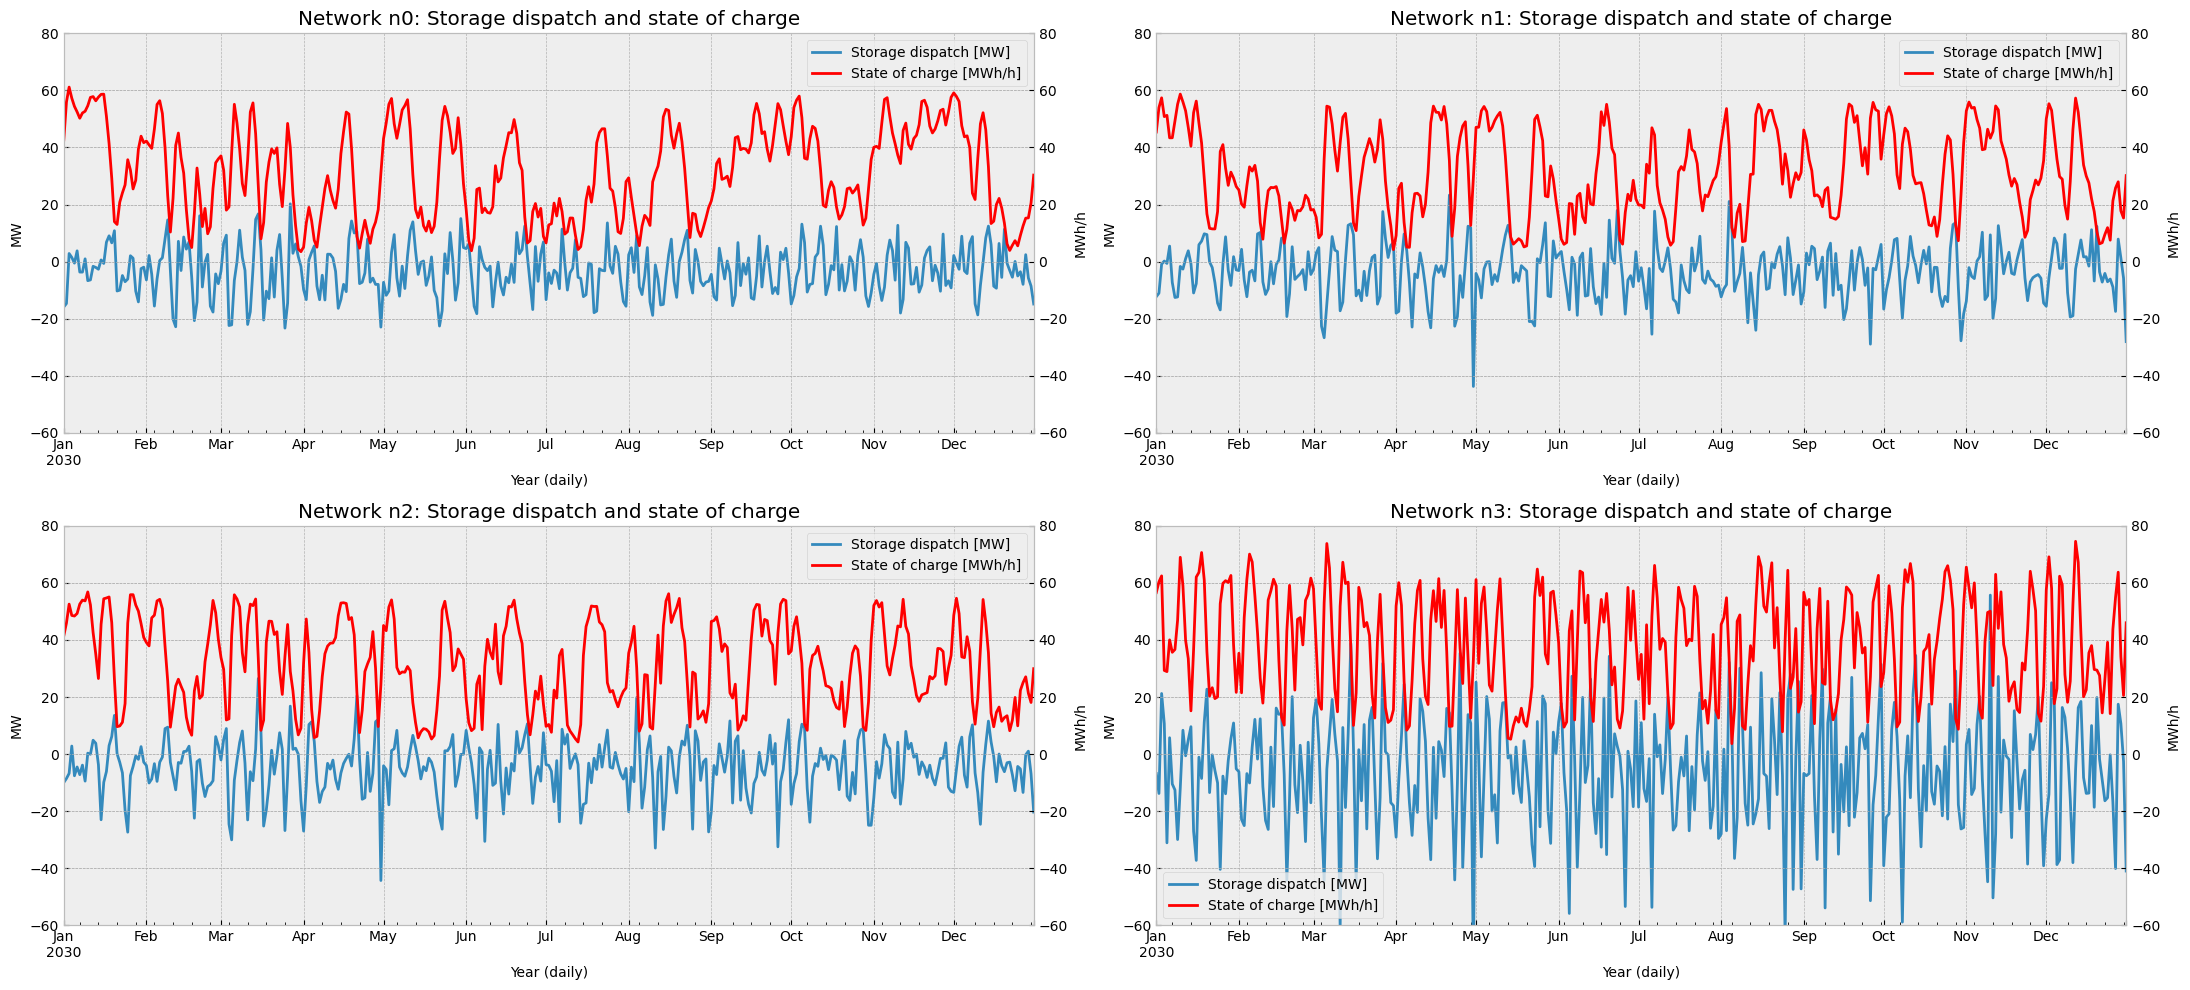

In [24]:
def plot_storage(network, title, ax):
    p_storage = network.storage_units_t.p.sum(axis=1).div(1e3)
    p_storage = p_storage.droplevel(level='period')
    p_storage = p_storage.resample("D").sum()
    state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1).div(1e3)/24
    state_of_charge = state_of_charge.droplevel(level='period')
    state_of_charge = state_of_charge.resample("D").sum()

    p_storage.plot(label="Storage dispatch [MW]", ax=ax, ylabel="MW")

    ax2 = ax.twinx()
    ax2.plot(state_of_charge, label="State of charge [MWh/h]", color="red")
    ax2.set_ylabel("MWh/h")

    ax.set_ylim([-60,80]) # -40,70
    ax2.set_ylim([-60, 80])

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)
    ax.set_xlabel("Year (daily)")

    ax.grid(True)
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(22, 10))

plot_storage(n0, "Network n0: Storage dispatch and state of charge", axs[0, 0])
plot_storage(n1, "Network n1: Storage dispatch and state of charge", axs[0, 1])
plot_storage(n2, "Network n2: Storage dispatch and state of charge", axs[1, 0])
plot_storage(n3, "Network n3: Storage dispatch and state of charge", axs[1, 1])

plt.tight_layout()
plt.savefig("storage_all_networks.png")


# 5. Transmission Lines

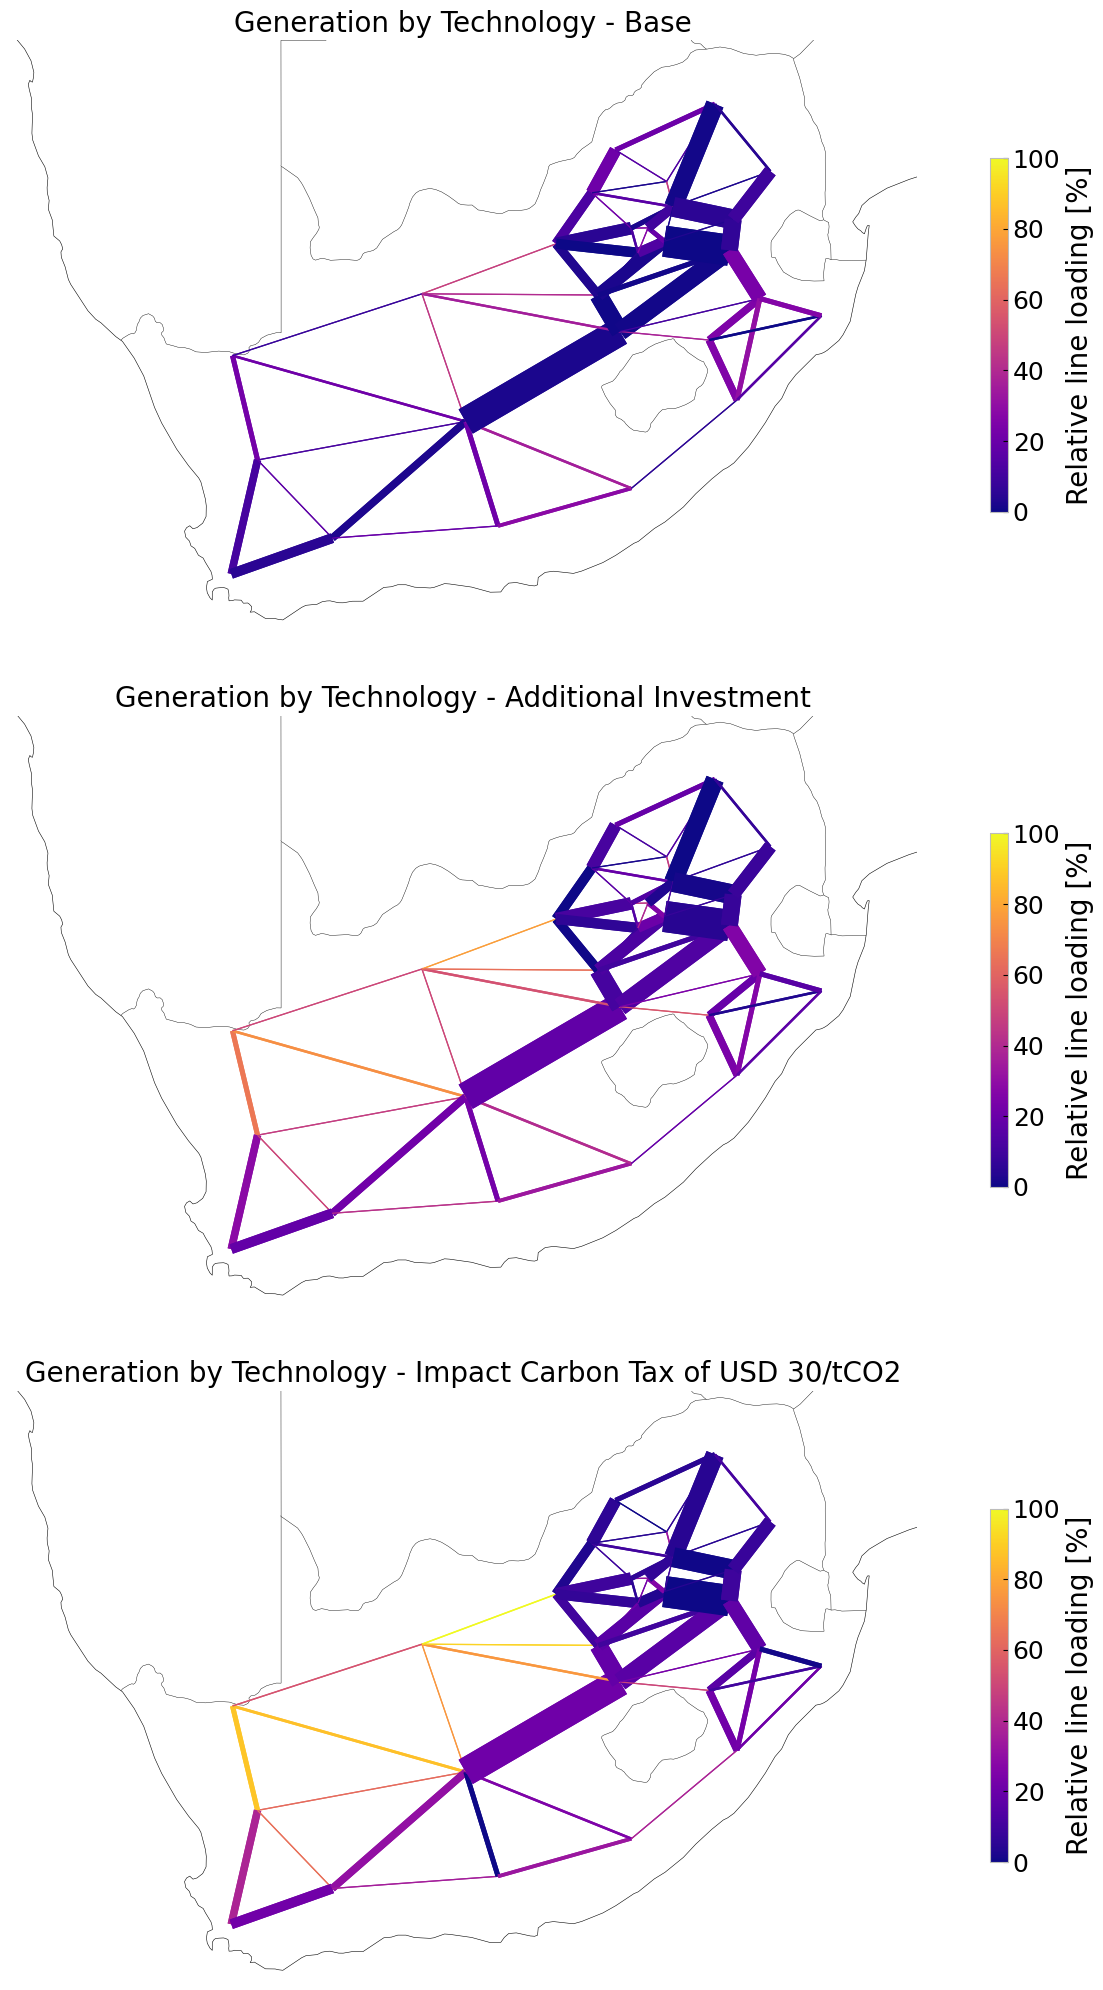

In [65]:
def plot_network_map(network, ax, title, boundaries=[14, 34, -35, -22]):
    line_loading = network.lines_t.p0.iloc[0].abs() / network.lines.s_nom_opt / network.lines.s_max_pu * 100  # %
    norm = plt.Normalize(vmin=0, vmax=100)

    network.plot(
        ax=ax,
        bus_sizes=0,
        line_colors=line_loading,
        line_norm=norm,
        line_cmap='plasma',
        line_widths=network.lines.s_nom_opt / 1000,
        boundaries=boundaries
    )

    cb = plt.colorbar(
        plt.cm.ScalarMappable(cmap='plasma', norm=norm),
        ax=ax,
        label='Relative line loading [%]',
        shrink=0.6
    )
    cb.set_label(label='Relative line loading [%]', size=20)  # Adjust font size for colorbar label
    cb.ax.tick_params(labelsize=18)  # Adjust font size for colorbar tick labels

    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

fig, axs = plt.subplots(3, 1, figsize=(15, 20), subplot_kw={'projection': ccrs.PlateCarree()})

networks = [n0, n2, n3]
titles = [
    'Generation by Technology - Base',
    'Generation by Technology - Additional Investment',
    'Generation by Technology - Impact Carbon Tax of USD 30/tCO2'
]

for ax, network, title in zip(axs, networks, titles):
    plot_network_map(network, ax, title)

plt.tight_layout(h_pad=4.0)
plt.savefig("network_maps_combined.png", dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


### Transmission Line Expansion

In [67]:
from matplotlib.colors import LinearSegmentedColormap

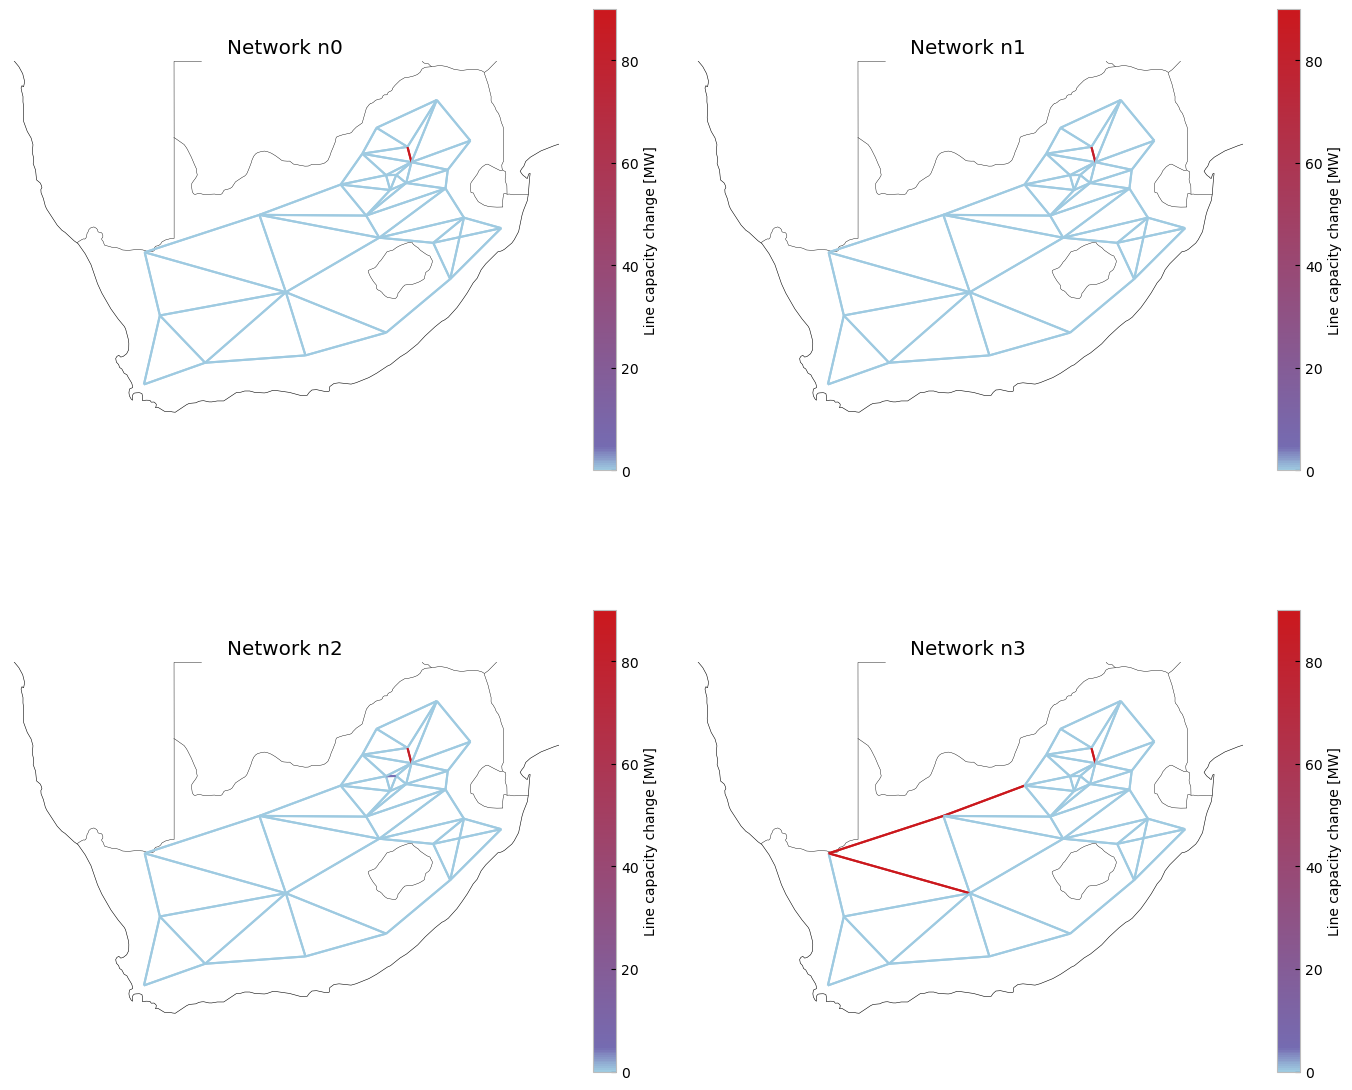

In [27]:
map_boundaries = [14, 34, -35, -22] 

custom_cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, '#9ecae1'), (0.05, '#756bb1'), (1, '#cb181d')])

fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n1, n2, n3]
labels = ['n0', 'n1', 'n2', 'n3']

for ax, network, label in zip(axs.flat, networks, labels):
    line_dif = (network.lines.s_nom_opt - network.lines.s_nom_min)
    norm = plt.Normalize(vmin=line_dif.min(), vmax=90)

    network.plot(
        ax=ax,
        bus_sizes=0,
        line_colors=line_dif,
        line_norm=norm,
        line_cmap=custom_cmap,
        line_widths=1.5,
        boundaries=map_boundaries
    )

    ax.set_title(f"Network {label}")
    plt.colorbar(
        plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm),
        ax=ax,
        label='Line capacity change [MW]',
        shrink=0.6
    )

plt.tight_layout()
plt.savefig("networks_line_capacity_changes.png")
plt.show()


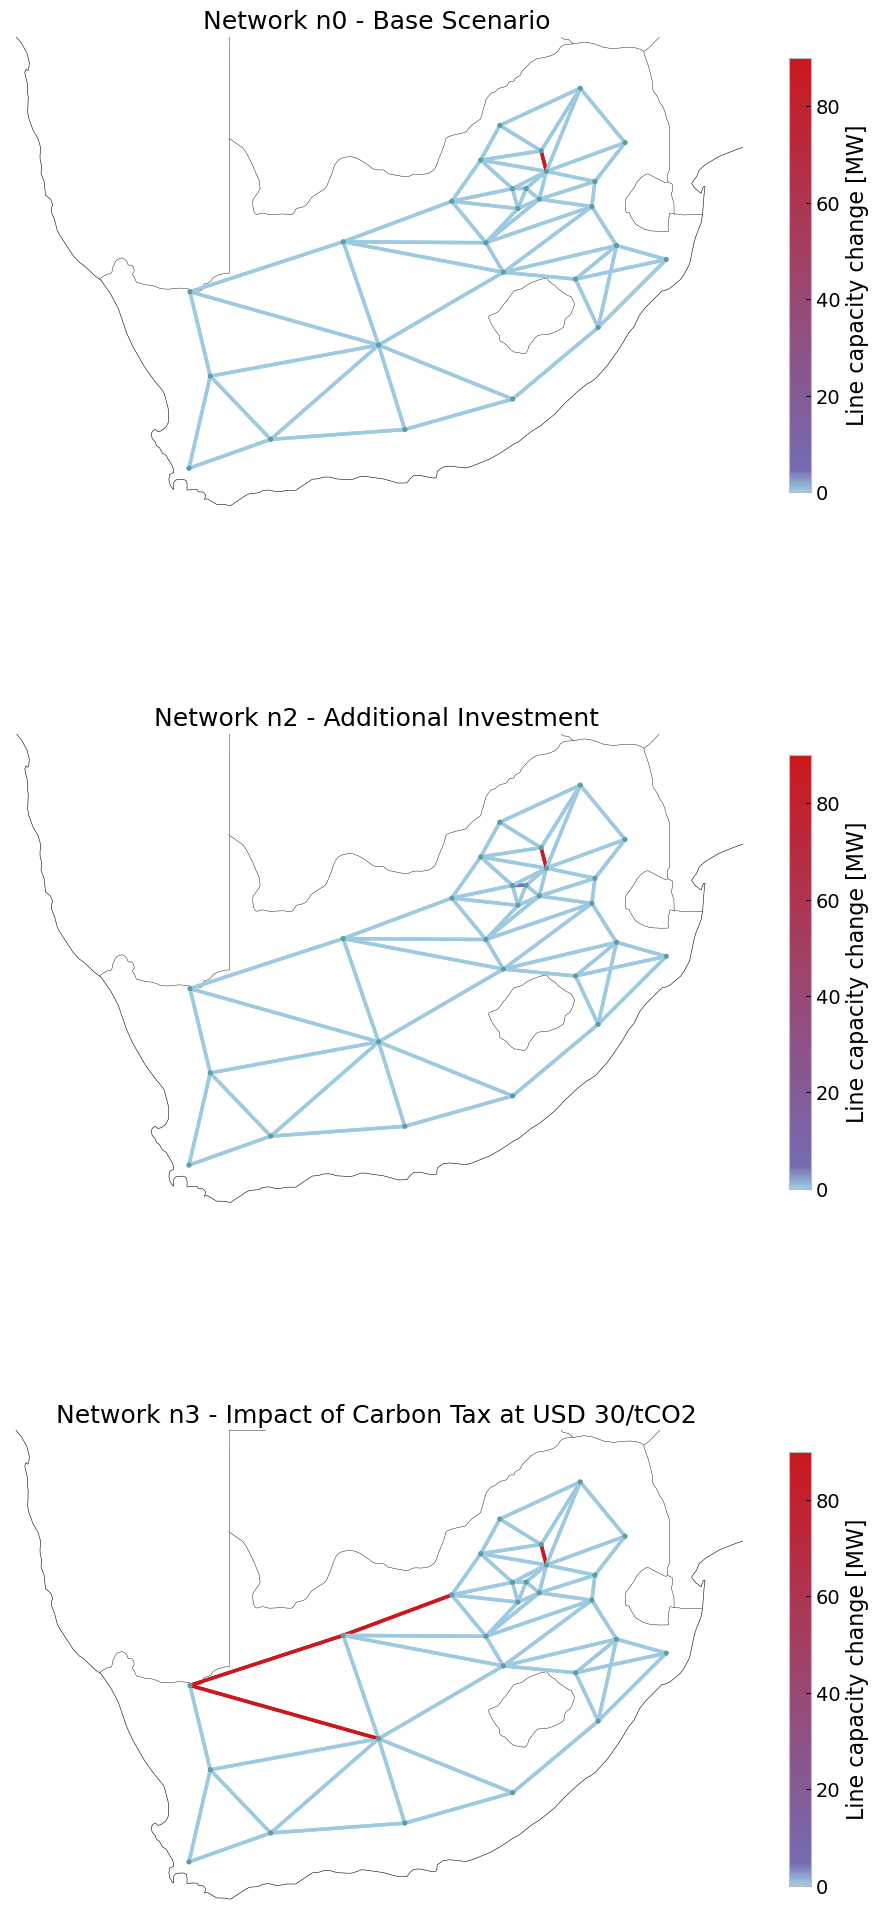

In [82]:
map_boundaries = [14, 34, -35, -22] 

custom_cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, '#9ecae1'), (0.05, '#756bb1'), (1, '#cb181d')])

fig, axs = plt.subplots(3, 1, figsize=(10, 22), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n2, n3]  # Removed n1

# Updated titles
titles = [
    "Network n0 - Base Scenario",
    "Network n2 - Additional Investment",
    "Network n3 - Impact of Carbon Tax at USD 30/tCO2"
]

for ax, network, title in zip(axs, networks, titles):
    line_dif = (network.lines.s_nom_opt - network.lines.s_nom_min)
    norm = plt.Normalize(vmin=line_dif.min(), vmax=90)

    network.plot(
        ax=ax,
        bus_sizes=0.005,
        line_colors=line_dif,
        line_norm=norm,
        line_cmap=custom_cmap,
        line_widths=2.5,
        boundaries=map_boundaries
    )

    ax.set_title(title, fontsize=18)
    cb = plt.colorbar(
        plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm),
        ax=ax,
        label='Line capacity change [MW]',
        shrink=0.6
    )
    cb.set_label(label='Line capacity change [MW]', size=16)  # Adjust font size for colorbar label
    cb.ax.tick_params(labelsize=14)  # Adjust font size for colorbar tick labels

plt.tight_layout(pad=3.0)  # Added padding for better spacing
plt.savefig("networks_line_capacity_changes.png")
plt.show()



In [83]:
def line_capacity(network, label):

    print(f"Network {label}:")

    # Before optimization
    ac_lines_before = network.lines["s_nom"]

    # After optimization
    ac_lines_after = network.lines["s_nom_opt"]

    print("Total AC line capacity before optimization:", ac_lines_before.sum())
    print("Total AC line capacity after optimization:", ac_lines_after.sum())
    print()

line_capacity(n0, 'n0')
line_capacity(n1, 'n1')
line_capacity(n2, 'n2')
line_capacity(n3, 'n3')

Network n0:
Total AC line capacity before optimization: 0.0
Total AC line capacity after optimization: 566633.3115725508

Network n1:
Total AC line capacity before optimization: 0.0
Total AC line capacity after optimization: 566612.9476551835

Network n2:
Total AC line capacity before optimization: 0.0
Total AC line capacity after optimization: 566624.1661613449

Network n3:
Total AC line capacity before optimization: 0.0
Total AC line capacity after optimization: 567707.9118554445



# 6. Total Annual System Costs

In [84]:
objectives = {
    'n0': n0.objective / 1e9,
    'n1': n1.objective / 1e9,
    'n2': n2.objective / 1e9,
    'n3': n3.objective / 1e9
}

# Converting the dictionary into a DataFrame
objectives_df = pd.DataFrame(list(objectives.items()), columns=['Network', 'Objective'])

# Print or display the DataFrame
print(objectives_df)

# If you want to save it to a CSV file
objectives_df.to_csv('total_costs.csv', index=False)


  Network   Objective
0      n0  225.933405
1      n1  229.772088
2      n2  240.580273
3      n3  285.367769


In [85]:
def aggregate_costs(n, flatten=False, opts=None, existing_only=False):
    components = dict(
        Link=("p_nom", "p0"),
        Generator=("p_nom", "p"),
        StorageUnit=("p_nom", "p"),
        Store=("e_nom", "p"),
        Line=("s_nom", None),
        Transformer=("s_nom", None),
    )

    costs = {}
    for c, (p_nom, p_attr) in zip(
        n.iterate_components(components.keys(), skip_empty=False), components.values()
    ):
        if c.df.empty:
            continue
        if not existing_only:
            p_nom += "_opt"
        costs[(c.list_name, "capital")] = (
            (c.df[p_nom] * c.df.capital_cost).groupby(c.df.carrier).sum()
        )
        if p_attr is not None:
            p = c.pnl[p_attr].sum()
            if c.name == "StorageUnit":
                p = p.loc[p > 0]
            costs[(c.list_name, "marginal")] = (
                (p * c.df.marginal_cost).groupby(c.df.carrier).sum()
            )
    costs = pd.concat(costs)

    if flatten:
        assert opts is not None
        conv_techs = opts["conv_techs"]

        costs = costs.reset_index(level=0, drop=True)
        costs = costs["capital"].add(
            costs["marginal"].rename({t: t + " marginal" for t in conv_techs}),
            fill_value=0.0,
        )

    return costs

In [31]:
costs_df0 = aggregate_costs(n0, flatten=False, opts=None, existing_only=False)
costs_df1 = aggregate_costs(n1, flatten=False, opts=None, existing_only=False)
costs_df2 = aggregate_costs(n2, flatten=False, opts=None, existing_only=False)
costs_df3 = aggregate_costs(n3, flatten=False, opts=None, existing_only=False)

# Combine all the cost DataFrames into a single DataFrame
combined_costs = pd.concat([costs_df0, costs_df1, costs_df2, costs_df3], axis=1, keys=['n0', 'n1', 'n2', 'n3'])

combined_costs_in_millions = combined_costs / 1e6  # Convert to millions

# Round the values to two decimal places
combined_costs_in_millions = combined_costs_in_millions.round(2)

# Print or display the formatted combined DataFrame
print(combined_costs_in_millions)

# Save the formatted DataFrame to a CSV file
combined_costs_in_millions.to_csv('combined_costs_formatted.csv')

                                            n0        n1        n2        n3
                       carrier                                              
generators    capital  CCGT               0.00      0.00      0.00    936.57
                       CSP             6299.74   6299.74   6299.74   6299.74
                       OCGT           14104.29  13094.45  11935.78   6079.96
                       biomass         1928.39   1928.39   1928.39   1928.39
                       coal           44780.69  44780.69  44780.69  44780.69
                       gas              642.99    642.99    642.99    642.99
                       hydro              0.00      0.00      0.00      0.00
                       hydro-import       0.00      0.00      0.00      0.00
                       load_shedding      0.00      0.00      0.00      0.00
                       nuclear         2200.70   2200.70   2200.70   2200.70
                       onwind         15916.53  40589.64  60060.82  97990.33

In [32]:
total_cost0 = costs_df0.sum().sum()
total_cost1 = costs_df1.sum().sum()
total_cost2 = costs_df2.sum().sum()
total_cost3 = costs_df3.sum().sum()


In [33]:
print(total_cost0)
print(total_cost1)
print(total_cost2)
print(total_cost3)

285860650474.08655
289696919721.06476
300476237240.70776
345276288610.2333


# 7. Marginal Price

In [86]:
bus_type_n0 = pd.Series(n0.buses.index.str[0:], n0.buses.index).replace("", "electricity")
prices_n0 = n0.buses_t.marginal_price.mean().groupby(bus_type_n0).mean()
average_price_n0 = prices_n0.mean()

bus_type_n1 = pd.Series(n1.buses.index.str[0:], n1.buses.index).replace("", "electricity")
prices_n1 = n1.buses_t.marginal_price.mean().groupby(bus_type_n1).mean()
average_price_n1 = prices_n1.mean()

bus_type_n2 = pd.Series(n2.buses.index.str[0:], n2.buses.index).replace("", "electricity")
prices_n2 = n2.buses_t.marginal_price.mean().groupby(bus_type_n2).mean()
average_price_n2 = prices_n2.mean()

bus_type_n3 = pd.Series(n3.buses.index.str[0:], n3.buses.index).replace("", "electricity")
prices_n3 = n3.buses_t.marginal_price.mean().groupby(bus_type_n3).mean()
average_price_n3 = prices_n3.mean()

print(f"Average Marginal Price for n0: {average_price_n0:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n1: {average_price_n1:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n2: {average_price_n2:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n3: {average_price_n3:.2f}  ZAR/MWh")


Average Marginal Price for n0: 543.73  ZAR/MWh
Average Marginal Price for n1: 431.06  ZAR/MWh
Average Marginal Price for n2: 321.31  ZAR/MWh
Average Marginal Price for n3: 718.34  ZAR/MWh


In [112]:
total_electricity_n3 = n3.generators_t.p.sum().sum() /1e3 #MWh

# in Mt -> USD 30/tCO2 * 17.637 * 1000
emissioncost3 = 23.114941 *30 *17.637 * 1000

#emissions costs / total generated electricity in MWh
tax_cost = emissioncost3 / total_electricity_n3

average_price_without_tax_n3 = average_price_n3 - tax_cost
print(f"Average Marginal Price for n3 without CO2 tax: {average_price_without_tax_n3:.2f} ZAR/MWh")


Average Marginal Price for n3 without CO2 tax: 674.55 ZAR/MWh


In [113]:
# Given CO2 tax in USD/tCO2
CO2_tax = 30*17.637

# Function to calculate the price with tax
def price_with_tax(network, average_price, emissions_in_mt):
    total_electricity = network.generators_t.p.sum().sum() / 1e3 # MWh
    emission_cost = emissions_in_mt * CO2_tax * 1000 # in USD
    tax_cost = emission_cost / total_electricity
    return average_price + tax_cost

# Emissions for each network in Mt
emissions = {
    'n0': 152.005776,
    'n1': 105.508525,
    'n2': 65.172835,

}

average_prices = {
    'n0': average_price_n0,
    'n1': average_price_n1,
    'n2': average_price_n2,

}

prices_with_tax = {}
for net, avg_price in average_prices.items():
    prices_with_tax[net] = price_with_tax(eval(net), avg_price, emissions[net])

for net, price in prices_with_tax.items():
    print(f"Average Marginal Price for {net} with CO2 tax: {price:.2f} ZAR/MWh")


Average Marginal Price for n0 with CO2 tax: 832.89 ZAR/MWh
Average Marginal Price for n1 with CO2 tax: 631.62 ZAR/MWh
Average Marginal Price for n2 with CO2 tax: 445.05 ZAR/MWh


In [115]:
# Your existing data dictionary:
data = {
    "Network": ["n0", "n1", "n2", "n3"],
    "Average Marginal Price Without CO2 Tax (ZAR/MWh)": [
        average_price_n0,
        average_price_n1,
        average_price_n2,
        average_price_without_tax_n3
    ]
}

# Add the average prices with tax to the data dictionary:
data["Average Marginal Price With CO2 Tax (ZAR/MWh)"] = [
    prices_with_tax.get("n0", average_price_n0),
    prices_with_tax.get("n1", average_price_n1),
    prices_with_tax.get("n2", average_price_n2),
    prices_with_tax.get("n3", average_price_n3)
]

# Convert the dictionary to a DataFrame:
df = pd.DataFrame(data)

# Save the DataFrame to a CSV:
df.to_csv("average_marginal_prices.csv", index=False)

print("Results saved in 'average_marginal_prices.csv'")


Results saved in 'average_marginal_prices.csv'


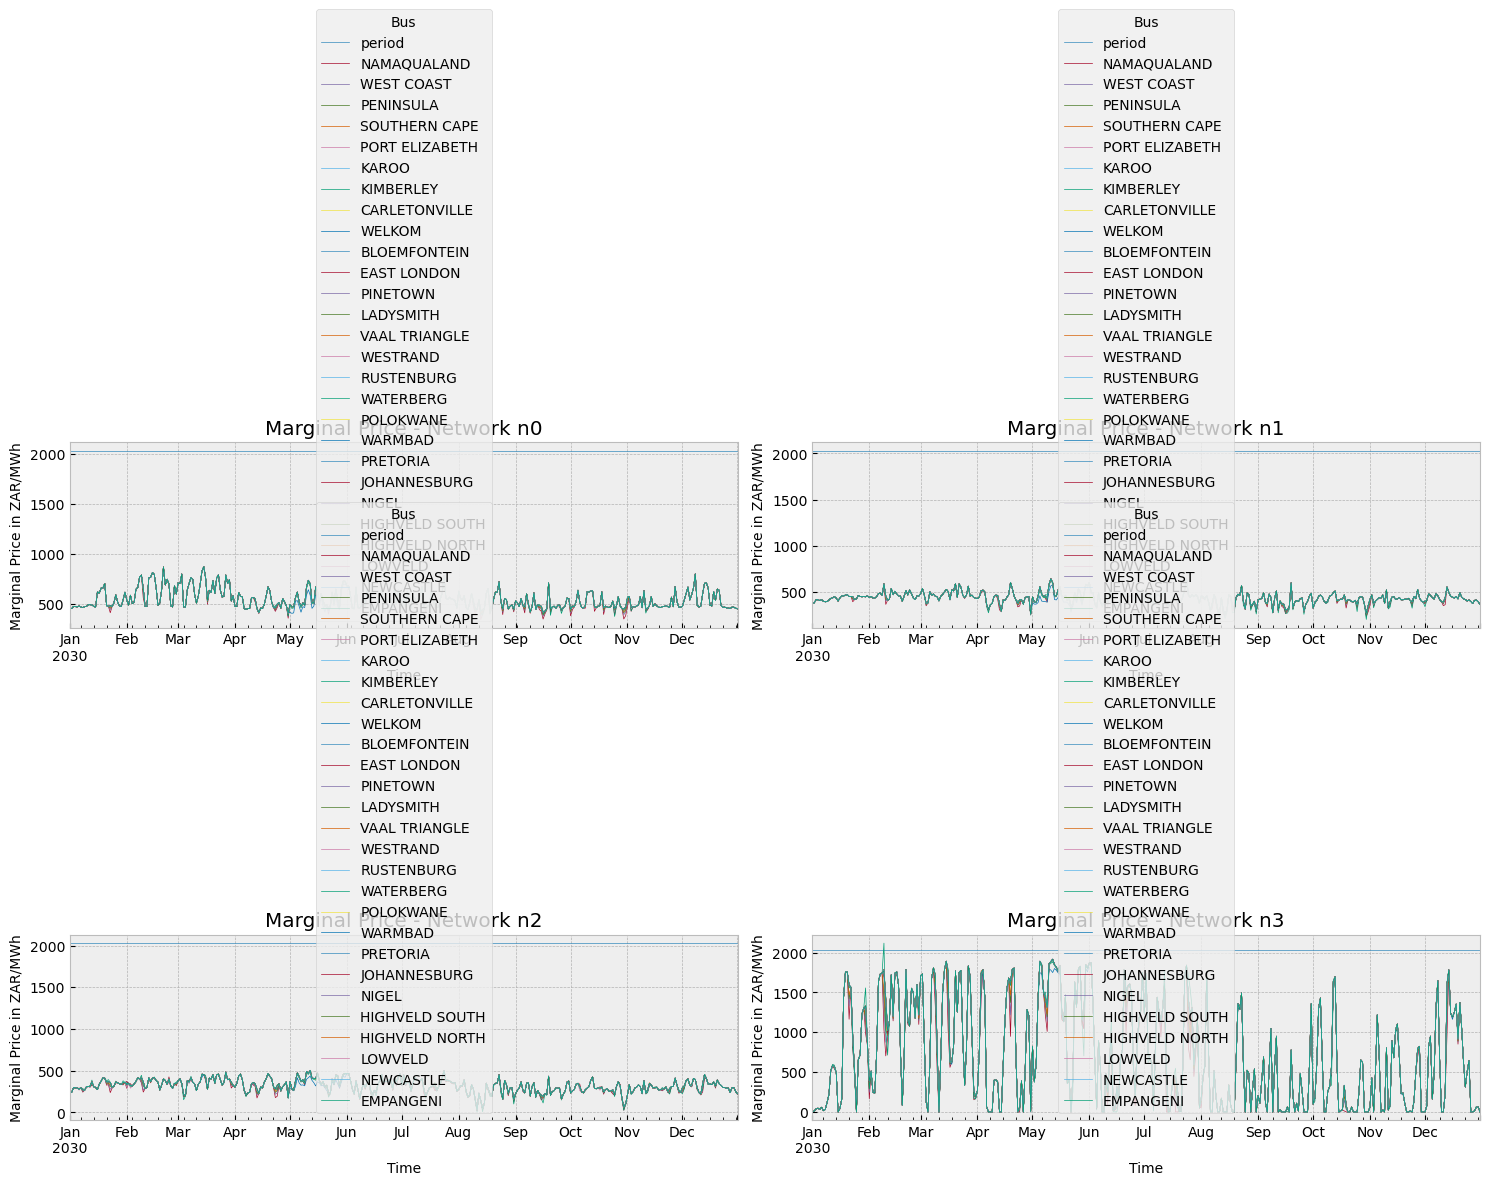

In [36]:
df_n0 = n0.buses_t.marginal_price.reset_index()
df_n1 = n1.buses_t.marginal_price.reset_index()
df_n2 = n2.buses_t.marginal_price.reset_index()
df_n3 = n3.buses_t.marginal_price.reset_index()

# Convert the 'timestep' column to datetime type for all DataFrames
for df in [df_n0, df_n1, df_n2, df_n3]:
    df['timestep'] = pd.to_datetime(df['timestep'])

# Set 'timestep' as the index for all DataFrames
for df in [df_n0, df_n1, df_n2, df_n3]:
    df.set_index('timestep', inplace=True)

# Resample the data for daily averages for all DataFrames
df_daily_n0 = df_n0.resample('D').mean()
df_daily_n1 = df_n1.resample('D').mean()
df_daily_n2 = df_n2.resample('D').mean()
df_daily_n3 = df_n3.resample('D').mean()

# Plotting the data in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
dataframes = [df_daily_n0, df_daily_n1, df_daily_n2, df_daily_n3]
titles = ['n0', 'n1', 'n2', 'n3']

for ax, df, title in zip(axs.flat, dataframes, titles):
    df.plot(kind='line', ax=ax, legend=True, linewidth=0.5)
    ax.set_ylabel('Marginal Price in ZAR/MWh')
    ax.set_xlabel('Time')
    ax.set_title(f'Marginal Price - Network {title}')

plt.tight_layout()
plt.savefig('marginal_price_2x2.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


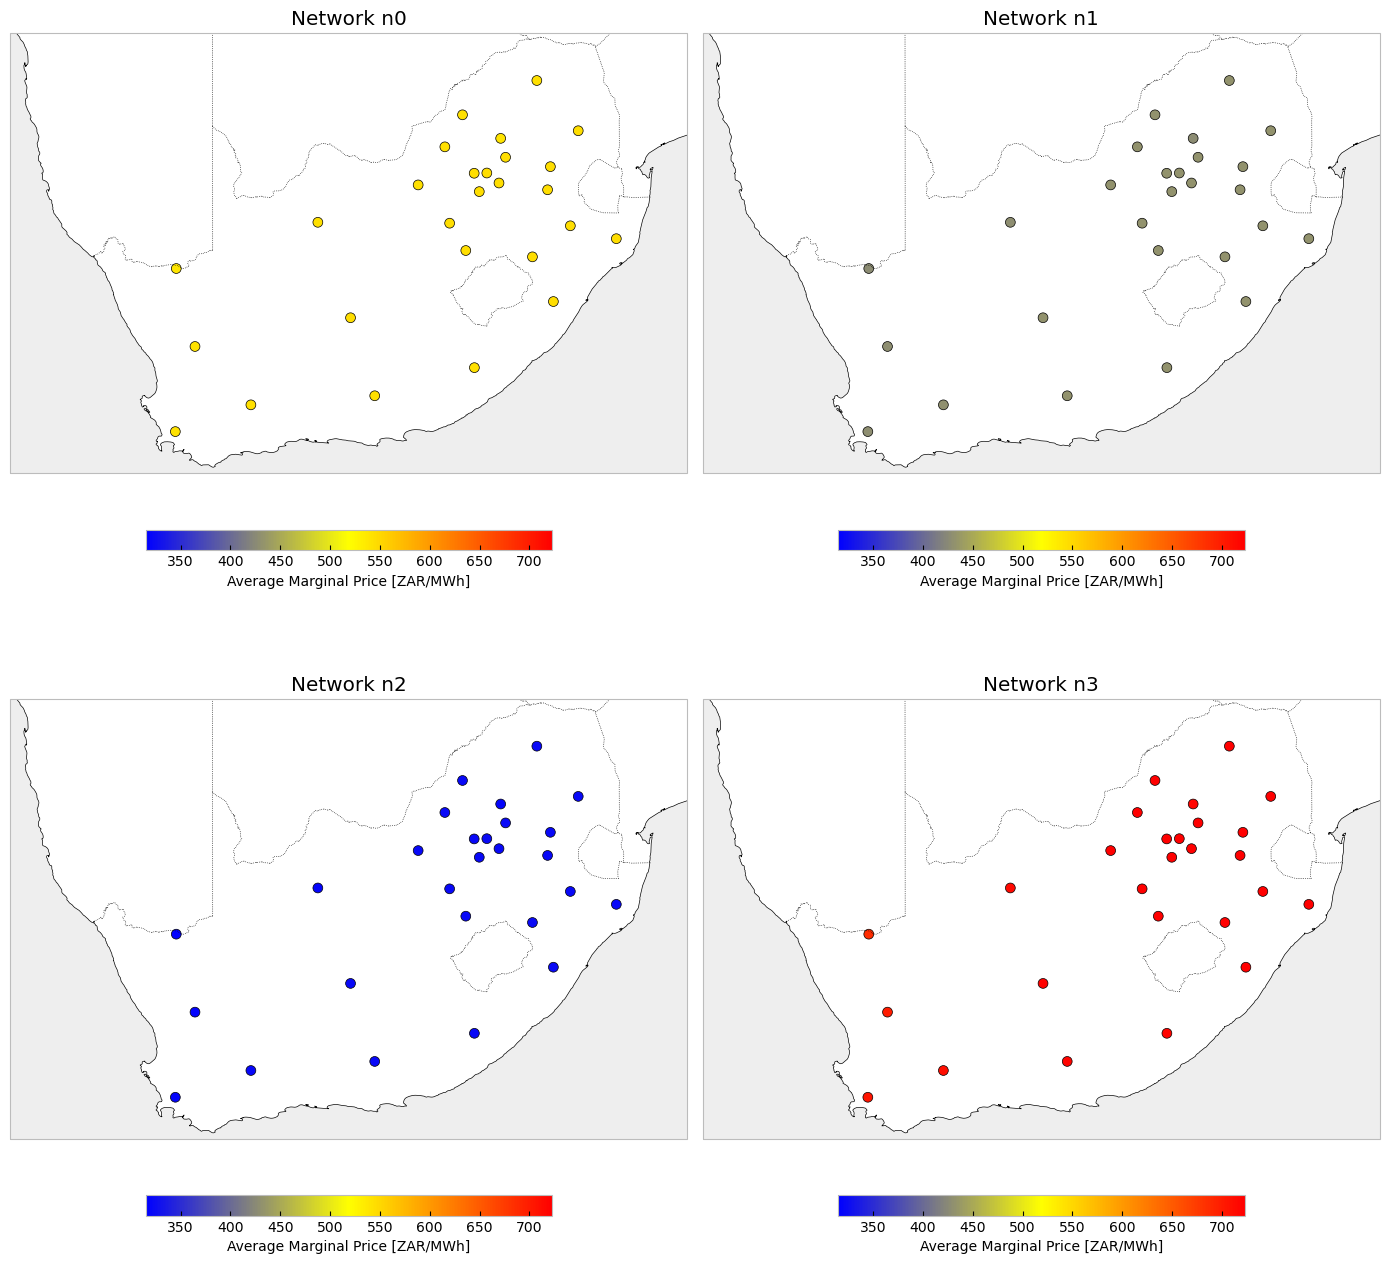

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_boundaries = [14, 34, -35, -22] 

# Create a custom colormap similar to the line capacity plot
custom_cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, 'blue'), (0.5, 'yellow'), (1, 'red')])

fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n1, n2, n3]
labels = ['n0', 'n1', 'n2', 'n3']

# Get global min and max marginal prices across all networks for consistent coloring
all_marginal_prices = [network.buses_t.marginal_price.mean() for network in networks]
global_min = min(price.min() for price in all_marginal_prices)
global_max = max(price.max() for price in all_marginal_prices)
scatter_norm = plt.Normalize(vmin=global_min, vmax=global_max)

for ax, network, label in zip(axs.flat, networks, labels):
    
    # Plot geographical features with the same appearance as in the line loading plot
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')  # Using a light grey for land, adjust as needed
    
    # Plotting buses with marginal prices using the custom colormap
    marginal_prices = network.buses_t.marginal_price.mean()
    sc = ax.scatter(network.buses['x'], network.buses['y'], c=marginal_prices, s=50, cmap=custom_cmap, edgecolors='k', linewidth=0.5, transform=ccrs.PlateCarree(), norm=scatter_norm)
    
    ax.set_title(f"Network {label}")
    ax.set_xlim(map_boundaries[0], map_boundaries[1])
    ax.set_ylim(map_boundaries[2], map_boundaries[3])
    ax.grid(True)
    
    # Colorbar for marginal prices using the custom colormap
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08, shrink=0.6)
    cbar.set_label('Average Marginal Price [ZAR/MWh]')

plt.tight_layout()
plt.savefig("map_marginal_prices.png")
plt.show()


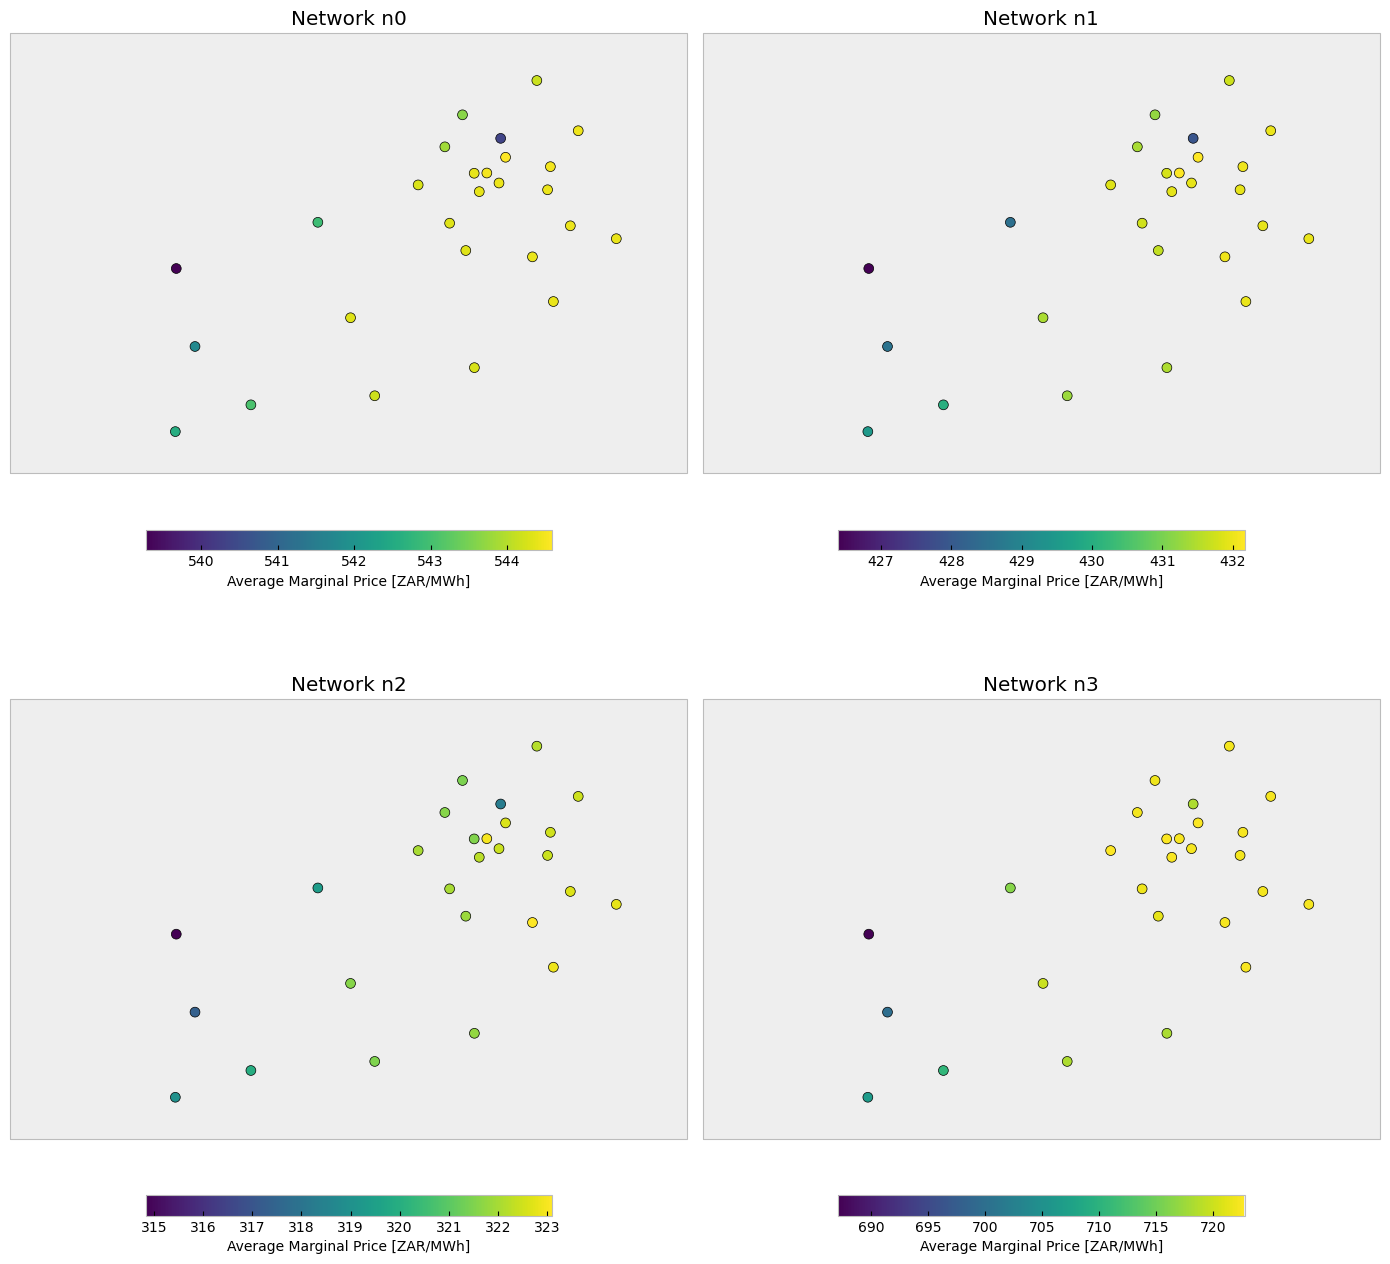

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs

map_boundaries = [14, 34, -35, -22] 

fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n1, n2, n3]
labels = ['n0', 'n1', 'n2', 'n3']

for ax, network, label in zip(axs.flat, networks, labels):
    
    # Plotting buses with marginal prices
    marginal_prices = network.buses_t.marginal_price.mean()
    scatter_norm = plt.Normalize(vmin=marginal_prices.min(), vmax=marginal_prices.max())
    sc = ax.scatter(network.buses['x'], network.buses['y'], c=marginal_prices, s=50, cmap='viridis', edgecolors='k', linewidth=0.5, transform=ccrs.PlateCarree(), norm=scatter_norm)
    
    ax.set_title(f"Network {label}")
    ax.set_xlim(map_boundaries[0], map_boundaries[1])
    ax.set_ylim(map_boundaries[2], map_boundaries[3])
    ax.grid(True)
    
    # Colorbar for marginal prices
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08, shrink=0.6)
    cbar.set_label('Average Marginal Price [ZAR/MWh]')

plt.tight_layout()
plt.savefig("networks_marginal_prices.png")
plt.show()


# 8. CO2 Emissions

In [30]:
#### Total CO2 emissions by the network (efficiency and fuel source)

In [116]:
networks = [n0, n1, n2, n3]

# empty DataFrame to store the results
all_emissions = pd.DataFrame()

# Loop through the networks and calculate the emissions
for idx, network in enumerate(networks):
    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier.rename(index={'CCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]
    
    all_emissions[f'n{idx}'] = e_carrier

# Compute the sum of emissions for each network and append it as a new row
all_emissions.loc['sum'] = all_emissions.sum()

# Print the result
print(all_emissions)


                 n0          n1         n2         n3
carrier                                              
coal     151.668654  105.367042  65.061273  22.789295
gas        0.337122    0.141483   0.111563   0.325646
sum      152.005776  105.508525  65.172835  23.114941


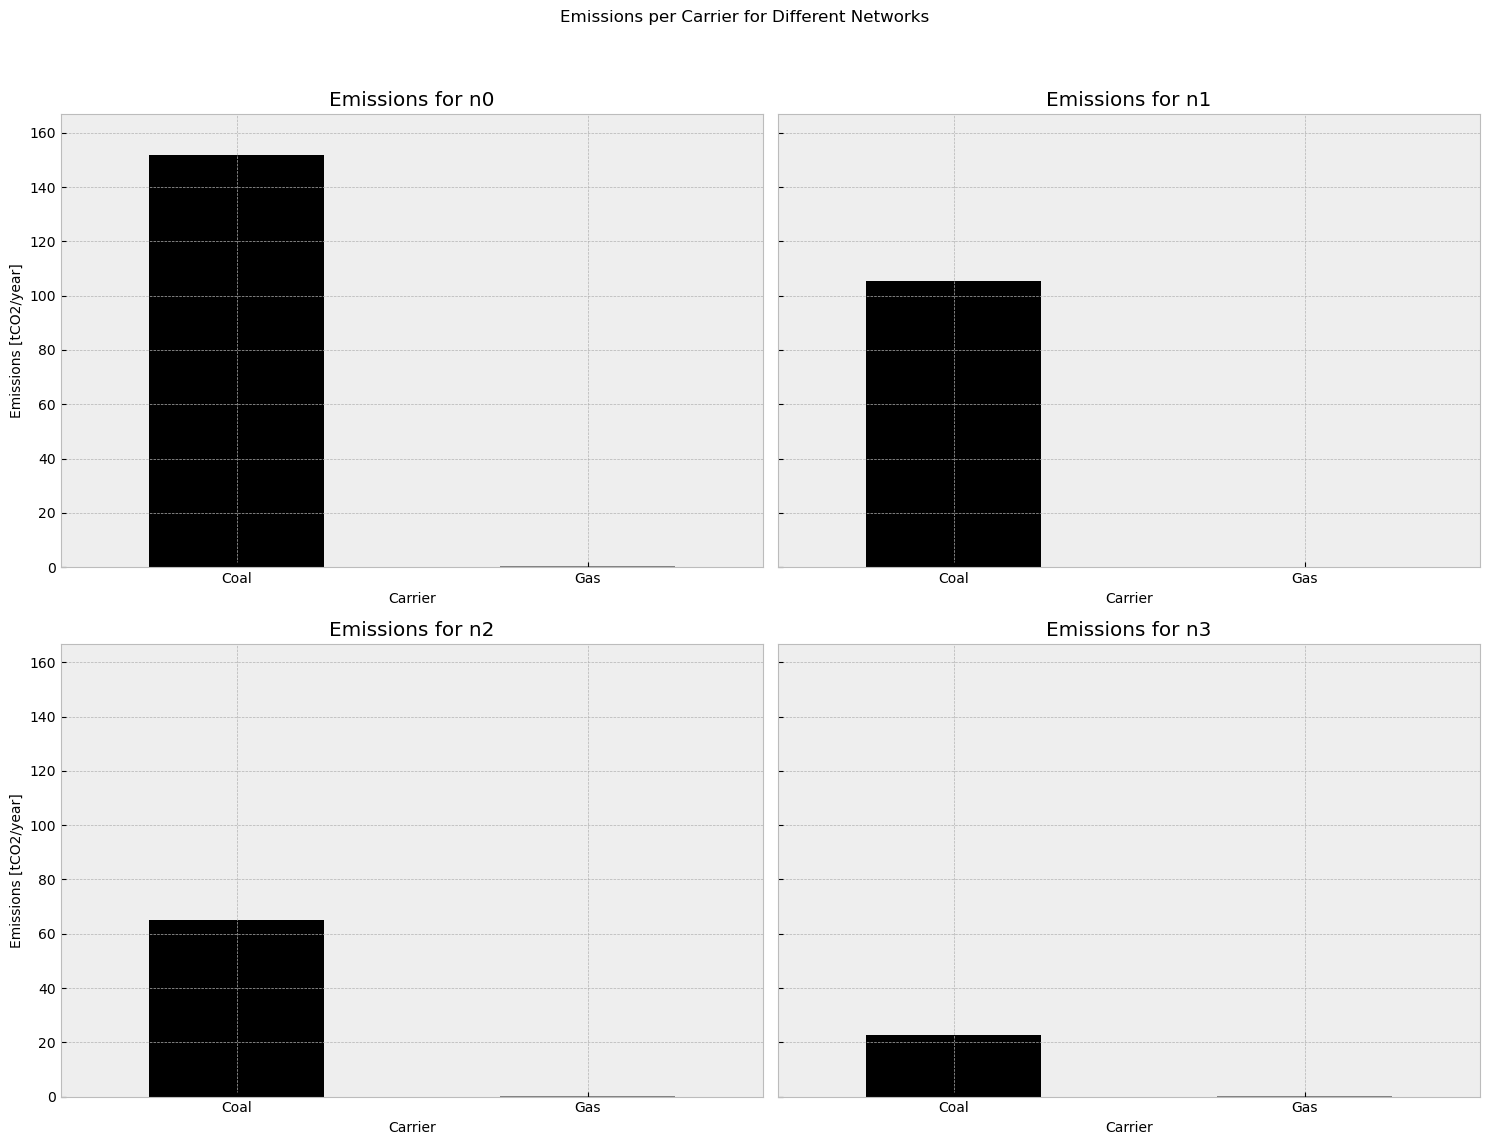

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Emissions per Carrier for Different Networks')

networks = [n0, n1, n2, n3]

max_y = 0

# First, find the maximum y-value to set the same y-limit for all subplots
for network in networks:
    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]
    max_y = max(max_y, e_carrier.max()*1.1)

for idx, network in enumerate(networks):
    row = idx // 2
    col = idx % 2

    ax = axes[row, col]

    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier.rename(index={'CCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]

    e_carrier.plot(kind="bar", ax=ax, rot=0, color=["black", "grey"])
    ax.set_xlabel("Carrier")
    ax.set_ylabel("Emissions [tCO2/year]")
    ax.set_title(f"Emissions for n{idx}")
    ax.set_ylim(0, max_y) # set the same y-limit for all subplots

    ax.set_xticklabels([nice_names.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()], fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make sure the titles fit well
plt.savefig("emissions_per_carrier_combined.png")
plt.show()


In [33]:
#### Plot total CO2 emissions per day

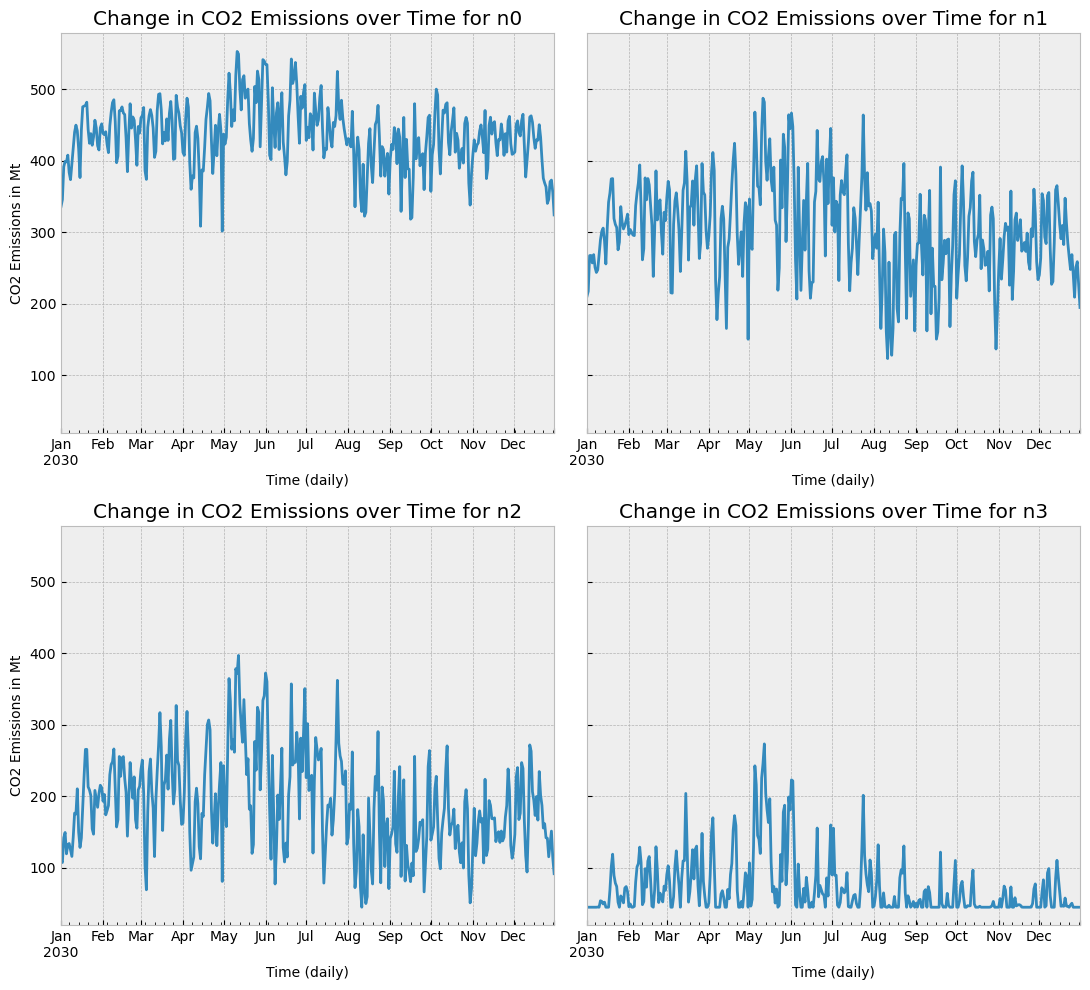

In [39]:
# List of networks
networks = [n0, n1, n2, n3]

# Create a subplot with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.flatten()  # Flatten the 2x2 grid to access the axes easily

for idx, network in enumerate(networks):
    # Calculate emissions
    emissions = (network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)).sum(axis=1)
    emissions = emissions.droplevel(level='period')
    emissions = emissions.resample("D").sum()/1e3
    
    # Plot emissions for this network
    emissions.plot(ax=axes[idx], title=f'Change in CO2 Emissions over Time for n{idx}',
                   xlabel='Time (daily)', ylabel='CO2 Emissions in Mt')

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig("emissions_all_networks.png")

# Show plot
plt.show()


Average Marginal Price for n3 without CO2 tax: 718.34 ZAR/MWh
